Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-12-11"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-12-11"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-11  Afghanistan_nan         0         202.0         537.0   
1  2020-12-11      Albania_nan         0         873.0        2378.0   
2  2020-12-11      Algeria_nan         0         565.0        1754.0   
3  2020-12-11      Andorra_nan         0          28.0         106.0   
4  2020-12-11       Angola_nan         0         121.0         277.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1216.0              48053.0               48229.0  35530000.0   
1        5560.0              46061.0               46813.0   2878445.0   
2        4652.0              90579.0               91349.0  41320000.0   
3         286.0               7190.0                7242.0     77239.0   
4         564.0              15925.0               15971.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001352   
1                                       0.016002   
2                                       0.002192   
3                                       0.093099   
4                                       0.000485   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013525                    176.0   
1                                           0.160024                    752.0   
2                                           0.021922                    770.0   
3                                           0.930994                     52.0   
4                                           0.004846                     46.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    4.953560             173.714279   
1                  261.252167             794.285706   
2                   18.635044             664.571411   
3                  673.235046              40.857143   
4                    1.399611              80.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.844920      
1                                         386.319702      
2                                          22.516941      
3                                         740.558533      
4                                           3.432090

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-11         United States_nan          210200.718750   
1   2020-12-11                Brazil_nan           42102.144531   
2   2020-12-11                 India_nan           32169.285156   
3   2020-12-11                Turkey_nan           31786.427734   
4   2020-12-11                Russia_nan           27311.285156   
5   2020-12-11               Germany_nan           20792.572266   
6   2020-12-11                 Italy_nan           17474.000000   
7   2020-12-11        United Kingdom_nan           16235.571289   
8   2020-12-11               Ukraine_nan           12622.142578   
9   2020-12-11                France_nan           11373.571289   
10  2020-12-11                  Iran_nan           11361.286133   
11  2020-12-11                Poland_nan           10498.000000   
12  2020-12-11                Mexico_nan           10354.713867   
13  2020-12-11              Colombia_nan            8084.143066   
14  2020-12-11                Serbia_nan            7152.285645   
15  2020-12-11           Netherlands_nan            6805.000000   
16  2020-12-11               Romania_nan            6699.428711   
17  2020-12-11                 Spain_nan            6307.714355   
18  2020-12-11             Indonesia_nan            5865.143066   
19  2020-12-11                Sweden_nan            5726.428711   
20  2020-12-11          South Africa_nan            5127.428711   
21  2020-12-11             Argentina_nan            4926.285645   
22  2020-12-11               Hungary_nan            4737.000000   
23  2020-12-11               Georgia_nan            4473.856934   
24  2020-12-11            Azerbaijan_nan            4148.714355   
25  2020-12-11           Switzerland_nan            4082.857178   
26  2020-12-11              Portugal_nan            3941.285645   
27  2020-12-11               Czechia_nan            3667.142822   
28  2020-12-11               Croatia_nan            3511.000000   
29  2020-12-11               Morocco_nan            3272.142822   
30  2020-12-11              Pakistan_nan            3179.285645   
31  2020-12-11                Jordan_nan            3126.285645   
32  2020-12-11               Austria_nan            2894.000000   
33  2020-12-11              Bulgaria_nan            2767.857178   
34  2020-12-11             Lithuania_nan            2402.428467   
35  2020-12-11                 Japan_nan            2352.571533   
36  2020-12-11               Belgium_nan            2220.000000   
37  2020-12-11               Denmark_nan            2192.714355   
38  2020-12-11            Bangladesh_nan            2032.285767   
39  2020-12-11                Panama_nan            2029.285767   
40  2020-12-11              Slovakia_nan            1959.000000   
41  2020-12-11            Canada_Ontario            1899.428589   
42  2020-12-11               Belarus_nan            1826.142822   
43  2020-12-11                  Iraq_nan            1783.714233   
44  2020-12-11    West Bank and Gaza_nan            1738.714233   
45  2020-12-11                  Peru_nan            1719.428589   
46  2020-12-11            Canada_Alberta            1718.714233   
47  2020-12-11             Canada_Quebec            1682.571411   
48  2020-12-11                 Chile_nan            1576.285767   
49  2020-12-11                Israel_nan            1570.142822   
50  2020-12-11              Slovenia_nan            1510.428589   
51  2020-12-11               Moldova_nan            1482.571411   
52  2020-12-11           Philippines_nan            1446.714233   
53  2020-12-11                Greece_nan            1388.000000   
54  2020-12-11                 Burma_nan            1352.714233   
55  2020-12-11              Malaysia_nan            1343.428589   
56  2020-12-11               Lebanon_nan            1338.571411   
57  2020-12-11  United Arab Emirates_nan            1236.285767   
58  2020-12-11               Tunisia_nan            1219.

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-11           United States_nan          210200.718750   
1   2020-12-11                  Brazil_nan           42102.144531   
2   2020-12-11                  Turkey_nan           31786.427734   
3   2020-12-11                  Russia_nan           27311.285156   
4   2020-12-11                 Germany_nan           20792.572266   
5   2020-12-11                   Italy_nan           17474.000000   
6   2020-12-11          United Kingdom_nan           16235.571289   
7   2020-12-11                 Ukraine_nan           12622.142578   
8   2020-12-11                  France_nan           11373.571289   
9   2020-12-11                    Iran_nan           11361.286133   
10  2020-12-11                  Poland_nan           10498.000000   
11  2020-12-11                  Mexico_nan           10354.713867   
12  2020-12-11                Colombia_nan            8084.143066   
13  2020-12-11                  Serbia_nan            7152.285645   
14  2020-12-11             Netherlands_nan            6805.000000   
15  2020-12-11                 Romania_nan            6699.428711   
16  2020-12-11                   Spain_nan            6307.714355   
17  2020-12-11                  Sweden_nan            5726.428711   
18  2020-12-11            South Africa_nan            5127.428711   
19  2020-12-11               Argentina_nan            4926.285645   
20  2020-12-11                 Hungary_nan            4737.000000   
21  2020-12-11                 Georgia_nan            4473.856934   
22  2020-12-11              Azerbaijan_nan            4148.714355   
23  2020-12-11             Switzerland_nan            4082.857178   
24  2020-12-11                Portugal_nan            3941.285645   
25  2020-12-11                 Czechia_nan            3667.142822   
26  2020-12-11                 Croatia_nan            3511.000000   
27  2020-12-11                 Morocco_nan            3272.142822   
28  2020-12-11                  Jordan_nan            3126.285645   
29  2020-12-11                 Austria_nan            2894.000000   
..         ...                         ...                    ...   
42  2020-12-11                  Israel_nan            1570.142822   
43  2020-12-11                Slovenia_nan            1510.428589   
44  2020-12-11                 Moldova_nan            1482.571411   
45  2020-12-11                  Greece_nan            1388.000000   
46  2020-12-11                 Lebanon_nan            1338.571411   
47  2020-12-11    United Arab Emirates_nan            1236.285767   
48  2020-12-11                 Tunisia_nan            1219.142822   
49  2020-12-11              Costa Rica_nan            1044.285767   
50  2020-12-11  Bosnia and Herzegovina_nan            1009.142883   
51  2020-12-11                 Armenia_nan             961.714294   
52  2020-12-11      Dominican Republic_nan             816.000000   
53  2020-12-11         North Macedonia_nan             807.428589   
54  2020-12-11                 Albania_nan             794.285706   
55  2020-12-11                Paraguay_nan             783.000000   
56  2020-12-11                  Kosovo_nan             698.142883   
57  2020-12-11     Canada_British Columbia             662.571411   
58  2020-12-11                  Latvia_nan             628.428589   
59  2020-12-11                   Libya_nan             619.142883   
60  2020-12-11              Luxembourg_nan             515.428589   
61  2020-12-11              Montenegro_nan             461.857147   
62  2020-12-11                 Finland_nan             450.000000   
63  2020-12-11                 Estonia_nan             447.000000   
64  2020-12-11                  Norway_nan             378.857147   
65  2020-12-11             Canada_Manitoba             313.714294   
66  2020-12-11                  Cyprus_nan             303.714294   
67  2020-12-11                 Uruguay_nan             290.285706   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-11           United States_nan          210200.718750   
1   2020-12-11                  Brazil_nan           42102.144531   
2   2020-12-11                  Turkey_nan           31786.427734   
3   2020-12-11                  Russia_nan           27311.285156   
4   2020-12-11                 Germany_nan           20792.572266   
5   2020-12-11                   Italy_nan           17474.000000   
6   2020-12-11          United Kingdom_nan           16235.571289   
7   2020-12-11                 Ukraine_nan           12622.142578   
8   2020-12-11                  Poland_nan           10498.000000   
9   2020-12-11                  Serbia_nan            7152.285645   
10  2020-12-11             Netherlands_nan            6805.000000   
11  2020-12-11                 Romania_nan            6699.428711   
12  2020-12-11                  Sweden_nan            5726.428711   
13  2020-12-11                 Hungary_nan            4737.000000   
14  2020-12-11                 Georgia_nan            4473.856934   
15  2020-12-11              Azerbaijan_nan            4148.714355   
16  2020-12-11             Switzerland_nan            4082.857178   
17  2020-12-11                Portugal_nan            3941.285645   
18  2020-12-11                 Czechia_nan            3667.142822   
19  2020-12-11                 Croatia_nan            3511.000000   
20  2020-12-11                  Jordan_nan            3126.285645   
21  2020-12-11                 Austria_nan            2894.000000   
22  2020-12-11                Bulgaria_nan            2767.857178   
23  2020-12-11               Lithuania_nan            2402.428467   
24  2020-12-11                 Belgium_nan            2220.000000   
25  2020-12-11                 Denmark_nan            2192.714355   
26  2020-12-11                  Panama_nan            2029.285767   
27  2020-12-11                Slovakia_nan            1959.000000   
28  2020-12-11                 Belarus_nan            1826.142822   
29  2020-12-11      West Bank and Gaza_nan            1738.714233   
30  2020-12-11              Canada_Alberta            1718.714233   
31  2020-12-11               Canada_Quebec            1682.571411   
32  2020-12-11                  Israel_nan            1570.142822   
33  2020-12-11                Slovenia_nan            1510.428589   
34  2020-12-11                 Moldova_nan            1482.571411   
35  2020-12-11                 Lebanon_nan            1338.571411   
36  2020-12-11              Costa Rica_nan            1044.285767   
37  2020-12-11  Bosnia and Herzegovina_nan            1009.142883   
38  2020-12-11                 Armenia_nan             961.714294   
39  2020-12-11         North Macedonia_nan             807.428589   
40  2020-12-11                 Albania_nan             794.285706   
41  2020-12-11                  Kosovo_nan             698.142883   
42  2020-12-11                  Latvia_nan             628.428589   
43  2020-12-11              Luxembourg_nan             515.428589   
44  2020-12-11              Montenegro_nan             461.857147   
45  2020-12-11                 Estonia_nan             447.000000   
46  2020-12-11             Canada_Manitoba             313.714294   
47  2020-12-11                  Cyprus_nan             303.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          889.059326          224452.0   
1                                          277.301819           53347.0   
2                                          550.686768           30424.0   
3                                          264.607605           27562.0   
4                                          351.607697           32734.0   
5                                          404.490753           16998.0   
6                                          342.110168           20964.0   
7                           

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-11                France_nan           11373.571289   
1   2020-12-11                  Iran_nan           11361.286133   
2   2020-12-11              Colombia_nan            8084.143066   
3   2020-12-11                 Spain_nan            6307.714355   
4   2020-12-11          South Africa_nan            5127.428711   
5   2020-12-11             Argentina_nan            4926.285645   
6   2020-12-11               Morocco_nan            3272.142822   
7   2020-12-11            Canada_Ontario            1899.428589   
8   2020-12-11                Greece_nan            1388.000000   
9   2020-12-11  United Arab Emirates_nan            1236.285767   
10  2020-12-11               Tunisia_nan            1219.142822   
11  2020-12-11              Paraguay_nan             783.000000   
12  2020-12-11   Canada_British Columbia             662.571411   
13  2020-12-11                 Libya_nan             619.142883   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          227.503922           13531.0   
1                                          189.370544           10403.0   
2                                          222.940750            7778.0   
3                                          189.258469            7955.0   
4                                          121.361977            8166.0   
5                                          152.899673            6994.0   
6                                          124.425781            3345.0   
7                                          182.512009            1930.0   
8                                          180.931091            1533.0   
9                                          184.127655            1255.0   
10                                         144.742584             958.0   
11                                         154.141403             812.0   
12                                         181.882355             723.0   
13                                         126.148041             661.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0        41370.0       79615.0            2335527.0  69990000.0   
1        31649.0       79529.0            1083023.0  83993000.0   
2        22811.0       56589.0            1399911.0  50765952.0   
3        17728.0       44154.0            1720056.0  46660000.0   
4        18886.0       35892.0             836764.0  59148672.0   
5        15907.0       34484.0            1482216.0  45106700.0   
6        10341.0       22905.0             391529.0  36817128.0   
7         5793.0       13296.0             138529.0  14570000.0   
8         4532.0        9716.0             121253.0  10740000.0   
9         3828.0        8654.0             181405.0   9400000.0   
10        3485.0        8534.0             107814.0  11791968.0   
11        2235.0        5481.0              90958.0   7111652.0   
12        1908.0        4638.0              40060.0   5100000.0   
13        2086.0        4334.0              89183.0   6871292.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.333695           
1                                            0.128942           
2                                            0.275758           
3                                            0.368636           
4                                            0.141468           
5                                            0.328602           
6                                            0.106345           
7                                            0.095079           
8                                            0.112899           
9                                            0.192985           
10                                           0.091431           
11                                           0.127901           
12                         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-11              Mexico_nan           10354.713867   
1  2020-12-11               Chile_nan            1576.285767   
2  2020-12-11  Dominican Republic_nan             816.000000   
3  2020-12-11             Finland_nan             450.000000   
4  2020-12-11              Norway_nan             378.857147   
5  2020-12-11             Uruguay_nan             290.285706   
6  2020-12-11             Ireland_nan             282.142853   
7  2020-12-11              Kuwait_nan             274.428558   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         112.690536           11897.0   
1                                         115.654236            1662.0   
2                                         105.538422            1560.0   
3                                         114.275352             840.0   
4                                          99.010643             498.0   
5                                         117.079353             383.0   
6                                          80.188766             303.0   
7                                          92.869232             291.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       34877.0       72483.0            1217126.0  128640792.0   
1        4298.0       11034.0             566440.0   19081012.0   
2        2583.0        5712.0             151721.0   10824494.0   
3        1691.0        3150.0              29572.0    5513000.0   
4        1320.0        2652.0              40023.0    5357000.0   
5         982.0        2032.0               8487.0    3471150.0   
6         735.0        1975.0              75203.0    4925877.0   
7         896.0        1921.0             145495.0    4137000.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.094614                   8682.0   
1                                           0.296861                   1552.0   
2                                           0.140165                    418.0   
3                                           0.053642                    206.0   
4                                           0.074713                    298.0   
5                                           0.024453                    217.0   
6                                           0.152671                    271.0   
7                                           0.351694                    250.0   

   delta_new_cases_per_1M_hab  
0                   67.490257  
1                   81.337402  
2                   38.616123  
3                   37.366226  
4                   55.628151  
5                   62.515305  
6                   55.015583  
7                   60.430264

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-12-11                    Oman_nan             191.428574   
1   2020-12-11            Saudi Arabia_nan             187.571426   
2   2020-12-11              Mauritania_nan             180.428574   
3   2020-12-11             Afghanistan_nan             173.714279   
4   2020-12-11                 Bolivia_nan             171.285721   
5   2020-12-11                   Ghana_nan             153.000000   
6   2020-12-11              Uzbekistan_nan             152.428574   
7   2020-12-11                   Qatar_nan             148.428574   
8   2020-12-11             China_Hong Kong             100.285713   
9   2020-12-11                    Mali_nan              99.428574   
10  2020-12-11                Zimbabwe_nan              93.857140   
11  2020-12-11                    Cuba_nan              92.857140   
12  2020-12-11                   Syria_nan              91.428574   
13  2020-12-11              Mozambique_nan              86.142860   
14  2020-12-11                  Angola_nan              80.571426   
15  2020-12-11            Burkina Faso_nan              73.857140   
16  2020-12-11                   Niger_nan              69.428574   
17  2020-12-11                Cameroon_nan              68.000000   
18  2020-12-11              France_Reunion              34.714287   
19  2020-12-11           Cote d'Ivoire_nan              28.714285   
20  2020-12-11                Thailand_nan              18.142857   
21  2020-12-11                 Iceland_nan              10.857142   
22  2020-12-11               Singapore_nan               8.285714   
23  2020-12-11           France_Martinique               7.857143   
24  2020-12-11               Nicaragua_nan               7.000000   
25  2020-12-11              China_Shanghai               5.714286   
26  2020-12-11                 Taiwan*_nan               5.428571   
27  2020-12-11   Australia_New South Wales               4.285714   
28  2020-12-11                 Vietnam_nan               3.428571   
29  2020-12-11             New Zealand_nan               3.285714   
30  2020-12-11                Cambodia_nan               3.142857   
31  2020-12-11               China_Sichuan               2.571429   
32  2020-12-11        Australia_Queensland               2.285714   
33  2020-12-11             China_Guangdong               2.285714   
34  2020-12-11                China_Fujian               1.285714   
35  2020-12-11        China_Inner Mongolia               0.571429   
36  2020-12-11                 China_Henan               0.428571   
37  2020-12-11                China_Yunnan               0.428571   
38  2020-12-11          China_Heilongjiang               0.285714   
39  2020-12-11               China_Beijing               0.142857   
40  2020-12-11               China_Guangxi               0.142857   
41  2020-12-11               China_Jiangsu               0.142857   
42  2020-12-11               China_Shaanxi               0.142857   
43  2020-12-11                China_Shanxi               0.142857   
44  2020-12-11               China_Tianjin               0.142857   
45  2020-12-11              China_Zhejiang               0.142857   
46  2020-12-11  United Kingdom_Isle of Man               0.142857   
47  2020-12-11   Australia_South Australia               0.000000   
48  2020-12-11          Australia_Victoria               0.000000   
49  2020-12-11                 China_Anhui               0.000000   
50  2020-12-11             China_Chongqing               0.000000   
51  2020-12-11                 China_Gansu               0.000000   
52  2020-12-11               China_Guizhou               0.000000   
53  2020-12-11                China_Hainan               0.000000   
54  2020-12-11                 China_Hebei               0.000000   
55  2020-12-11                 China_Hubei               0.000000   
56  2020-12-11                 China_Hunan               0.000000   
57  2020

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-12-11                                    Oman_nan   
1   2020-12-11                            Saudi Arabia_nan   
2   2020-12-11                              Mauritania_nan   
3   2020-12-11                             Afghanistan_nan   
4   2020-12-11                                 Bolivia_nan   
5   2020-12-11                                   Ghana_nan   
6   2020-12-11                              Uzbekistan_nan   
7   2020-12-11                                   Qatar_nan   
8   2020-12-11                             China_Hong Kong   
9   2020-12-11                                    Mali_nan   
10  2020-12-11                                Zimbabwe_nan   
11  2020-12-11                                    Cuba_nan   
12  2020-12-11                                   Syria_nan   
13  2020-12-11                              Mozambique_nan   
14  2020-12-11                                  Angola_nan   
15  2020-12-11                            Burkina Faso_nan   
16  2020-12-11                                   Niger_nan   
17  2020-12-11                                Cameroon_nan   
18  2020-12-11                              France_Reunion   
19  2020-12-11                           Cote d'Ivoire_nan   
20  2020-12-11                                Thailand_nan   
21  2020-12-11                                 Iceland_nan   
22  2020-12-11                               Singapore_nan   
23  2020-12-11                           France_Martinique   
24  2020-12-11                               Nicaragua_nan   
25  2020-12-11                              China_Shanghai   
26  2020-12-11                                 Taiwan*_nan   
27  2020-12-11                   Australia_New South Wales   
28  2020-12-11                                 Vietnam_nan   
29  2020-12-11                             New Zealand_nan   
..         ...                                         ...   
39  2020-12-11                               China_Beijing   
40  2020-12-11                               China_Guangxi   
41  2020-12-11                               China_Jiangsu   
42  2020-12-11                               China_Shaanxi   
43  2020-12-11                                China_Shanxi   
44  2020-12-11                               China_Tianjin   
45  2020-12-11                              China_Zhejiang   
46  2020-12-11                  United Kingdom_Isle of Man   
47  2020-12-11                   Australia_South Australia   
48  2020-12-11                          Australia_Victoria   
49  2020-12-11                                 China_Anhui   
50  2020-12-11                             China_Chongqing   
51  2020-12-11                                 China_Gansu   
52  2020-12-11                               China_Guizhou   
53  2020-12-11                                China_Hainan   
54  2020-12-11                                 China_Hebei   
55  2020-12-11                                 China_Hubei   
56  2020-12-11                                 China_Hunan   
57  2020-12-11                               China_Jiangxi   
58  2020-12-11                                 China_Jilin   
59  2020-12-11                              China_Liaoning   
60  2020-12-11                                 China_Macau   
61  2020-12-11                               China_Ningxia   
62  2020-12-11                               China_Qinghai   
63  2020-12-11                              China_Shandong   
64  2020-12-11                                 China_Tibet   
65  2020-12-11                              China_Xinjiang   
66  2020-12-11                                Holy See_nan   
67  2020-12-11  United Kingdom_Falkland Islands (Malvinas)   
68  2020-12-11                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              191.428574   
1              187.571426   
2              180.428574   
3              173.714279   
4              171.2

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-11' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date                region confirmed  1_day_change  3_day_change  \
0  2020-12-11  Congo (Kinshasa)_nan         0         154.0         402.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         865.0              13997.0               14108.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                         0.0014   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013998                    111.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                        11.1             123.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                          17.299999

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-11' and population in (10000000.0 ) order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                          Marshall Islands_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                             Netherlands_Aruba
62  Netherlands_Bonaire, Sint Eustatius and Saba
63                      Netherlands_Sint Maarten
64                          Papua New Guinea_nan
65                                    Rwanda_nan
66                     Saint Kitts and Nevis_nan
67                               Saint Lucia_nan
68          Saint Vincent and the Grenadines_nan
69                                     Samoa_nan
70                     Sao Tome and Principe_nan
71                                   Senegal_nan
72                                Seychelles_nan
73                              Sierra Leone_nan
74                           Solomon Islands_nan
75                                   Somalia_nan
76                               South Sudan_nan
77                                  Suriname_nan
78                                Tajikistan_nan
79                                  Tanzania_nan

[80 rows x 1 columns]

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-11' and region > 'Tanzania_nan' and
     population in (10000000.0 ) order by region asc

region
0                           Timor-Leste_nan
1                                  Togo_nan
2                   Trinidad and Tobago_nan
3                   United Kingdom_Anguilla
4                    United Kingdom_Bermuda
5     United Kingdom_British Virgin Islands
6             United Kingdom_Cayman Islands
7   United Kingdom_Turks and Caicos Islands
8                               Vanuatu_nan
9                                 Yemen_nan
10                               Zambia_nan

In [19]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-28' and  date <= '2020-12-11' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


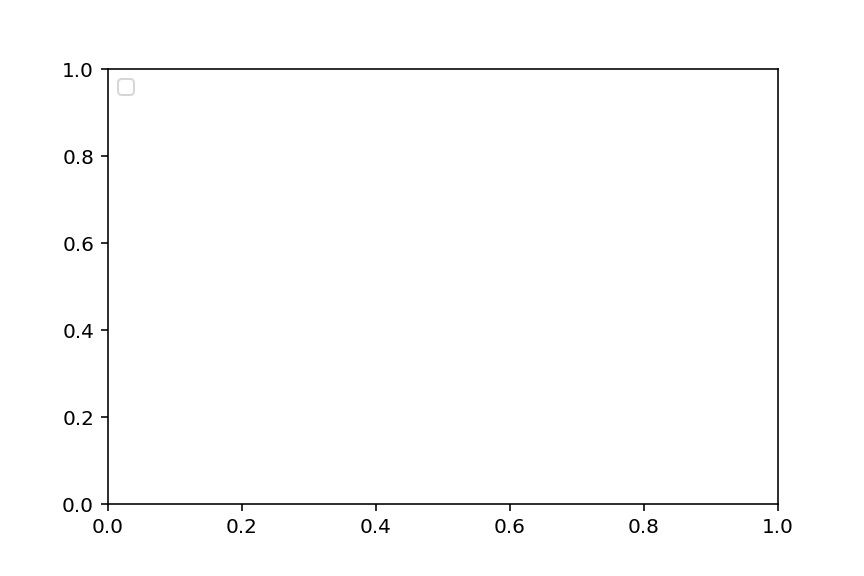

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


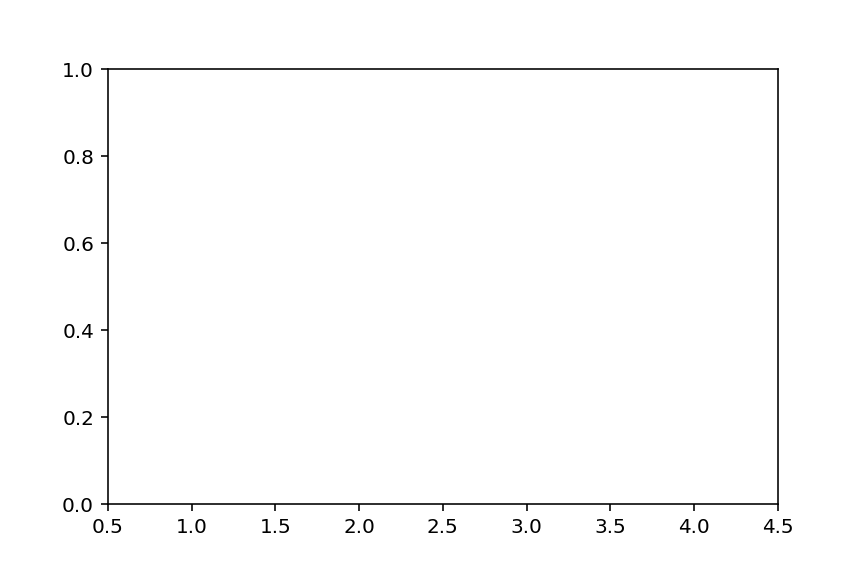

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


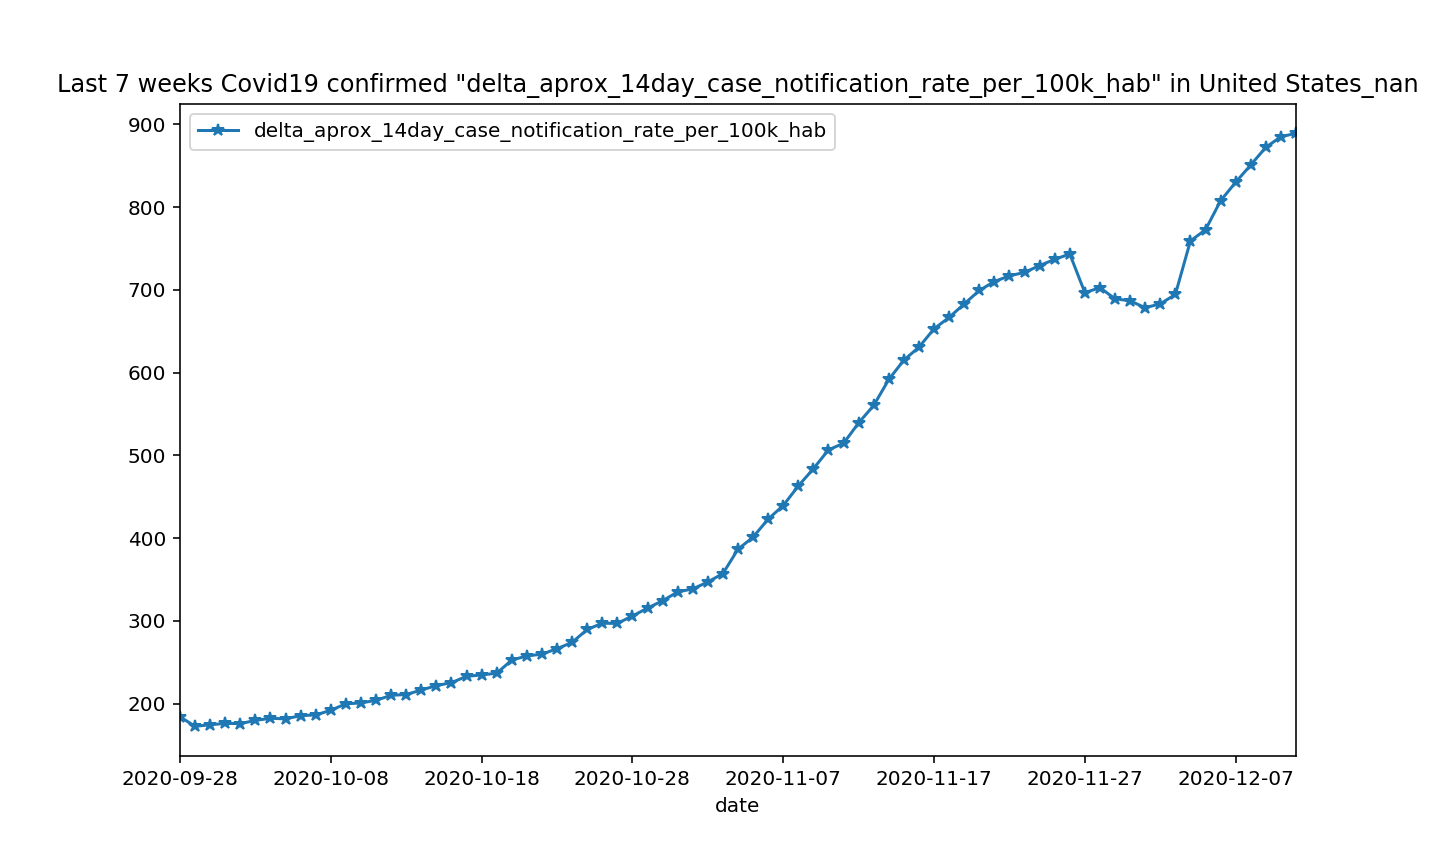

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


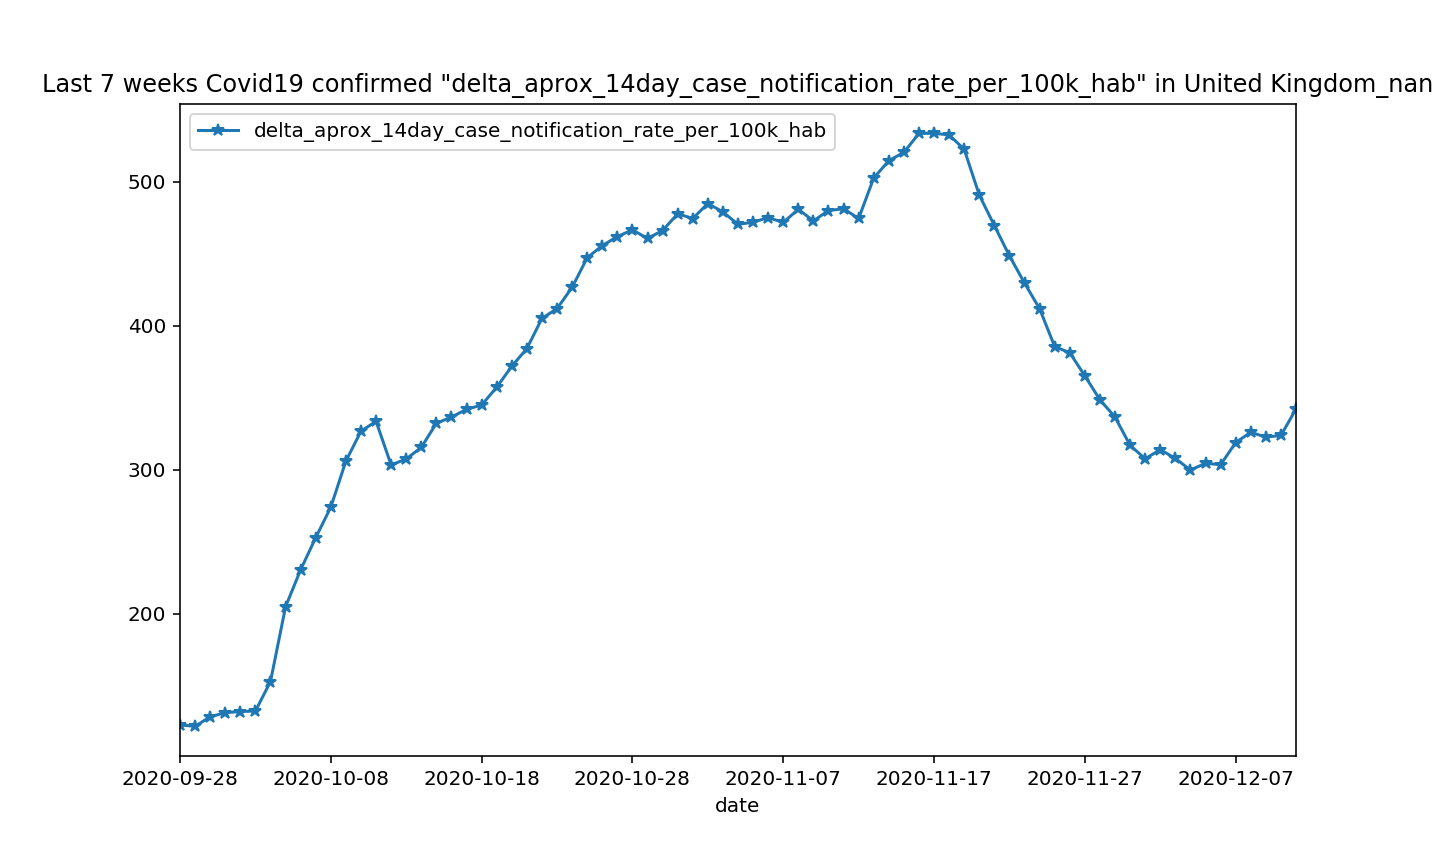

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


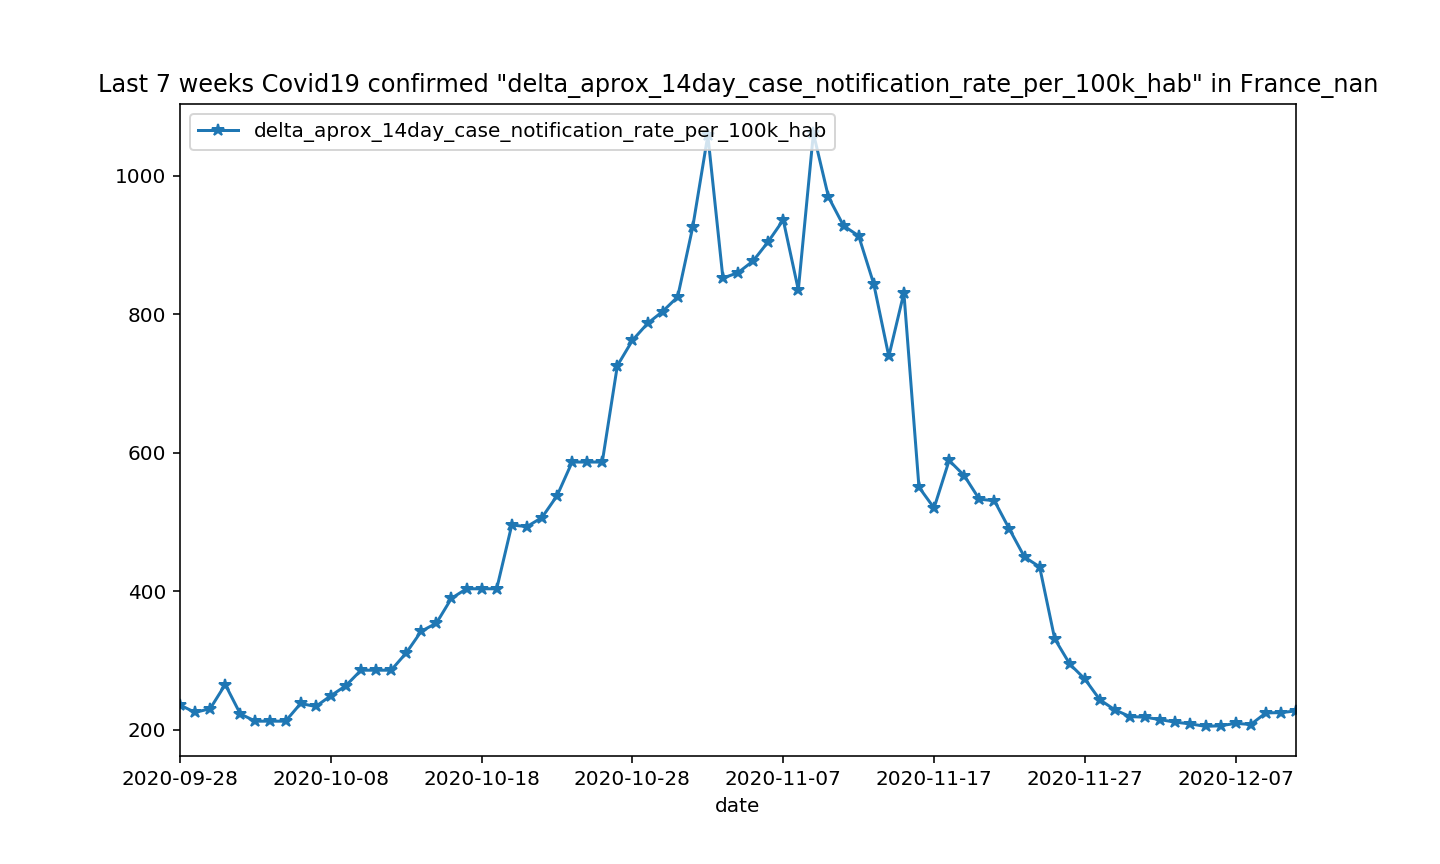

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


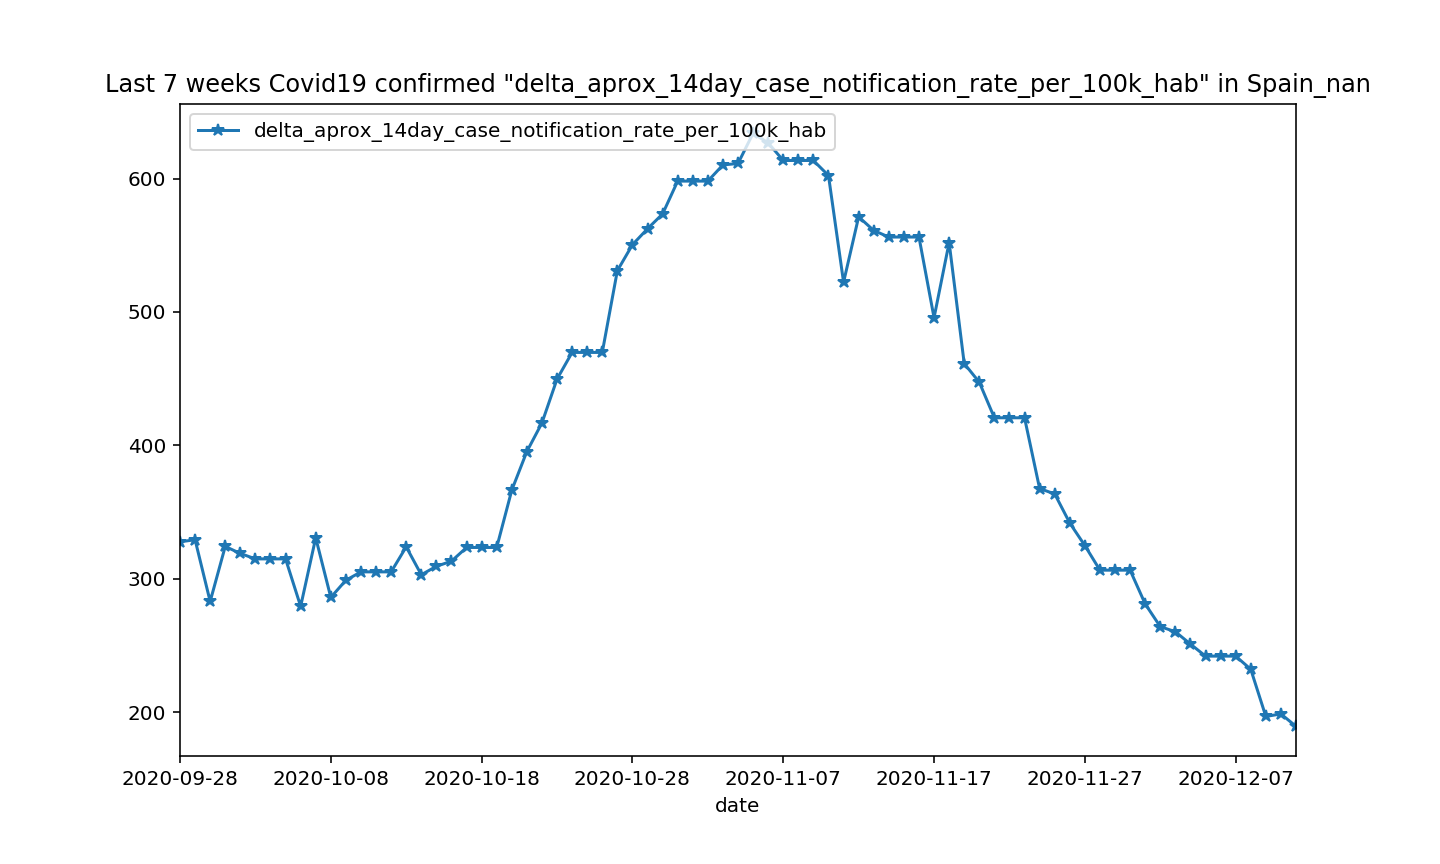

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


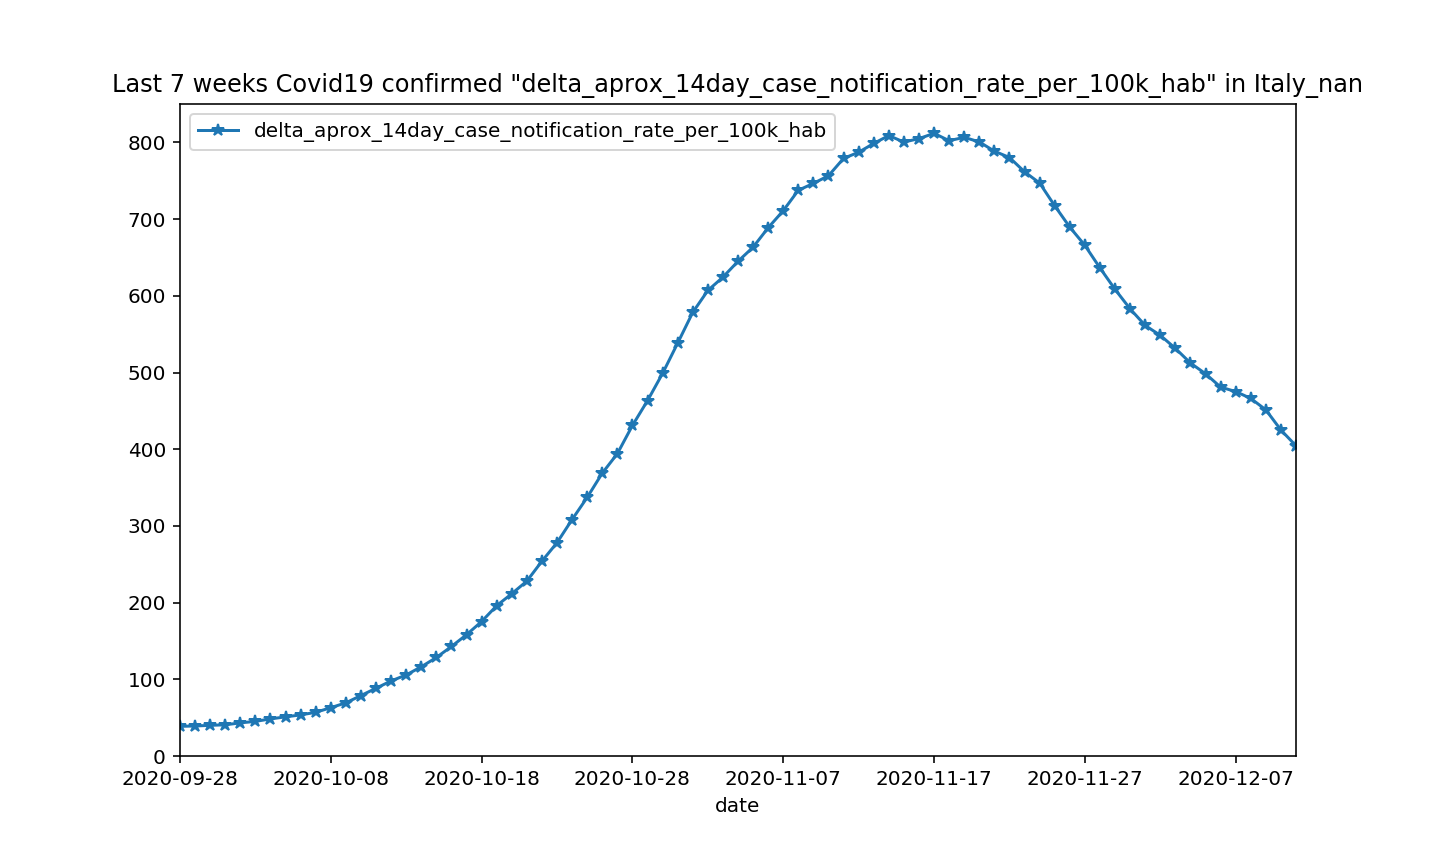

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


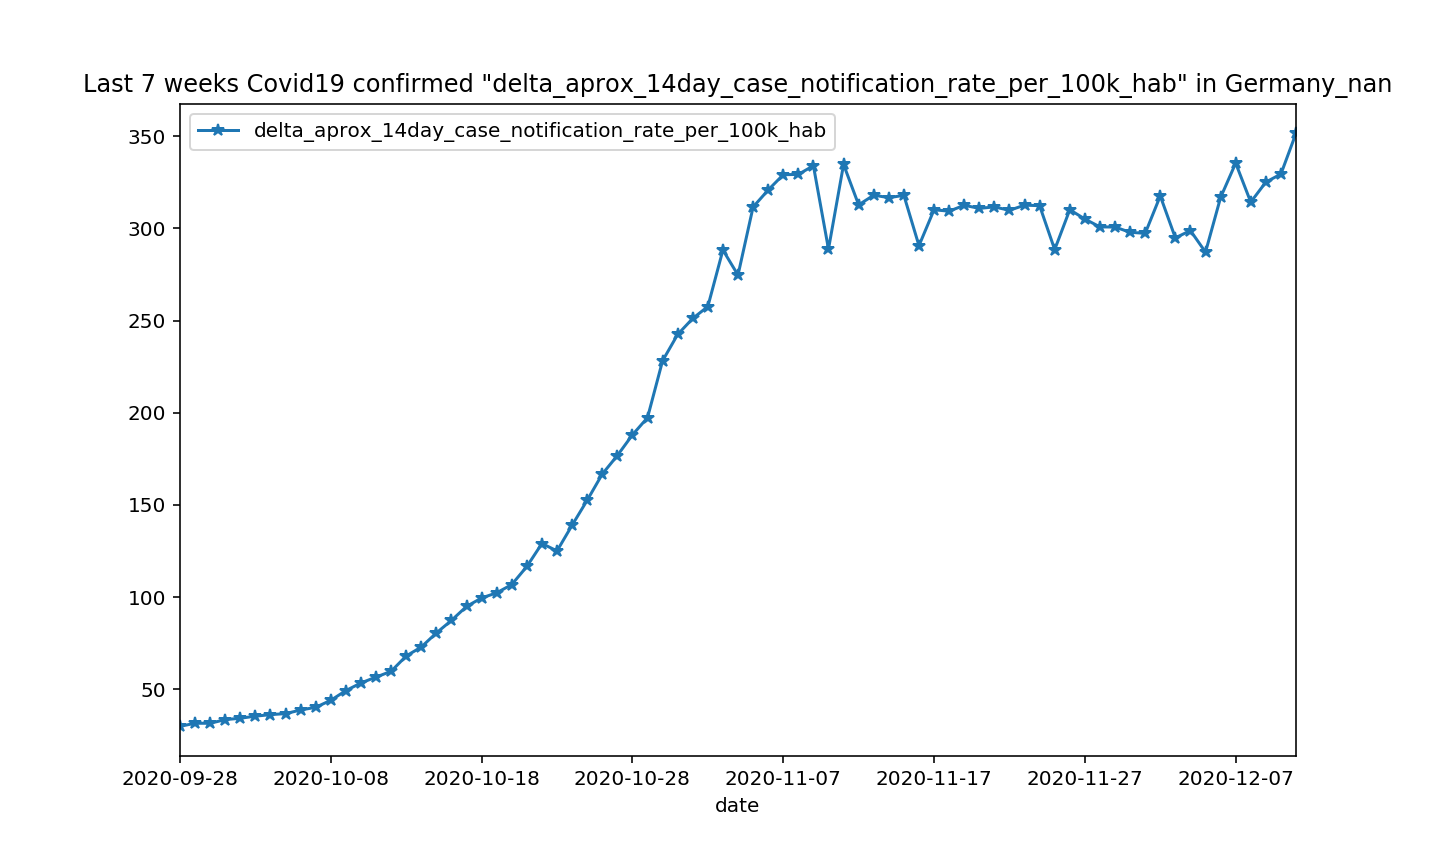

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


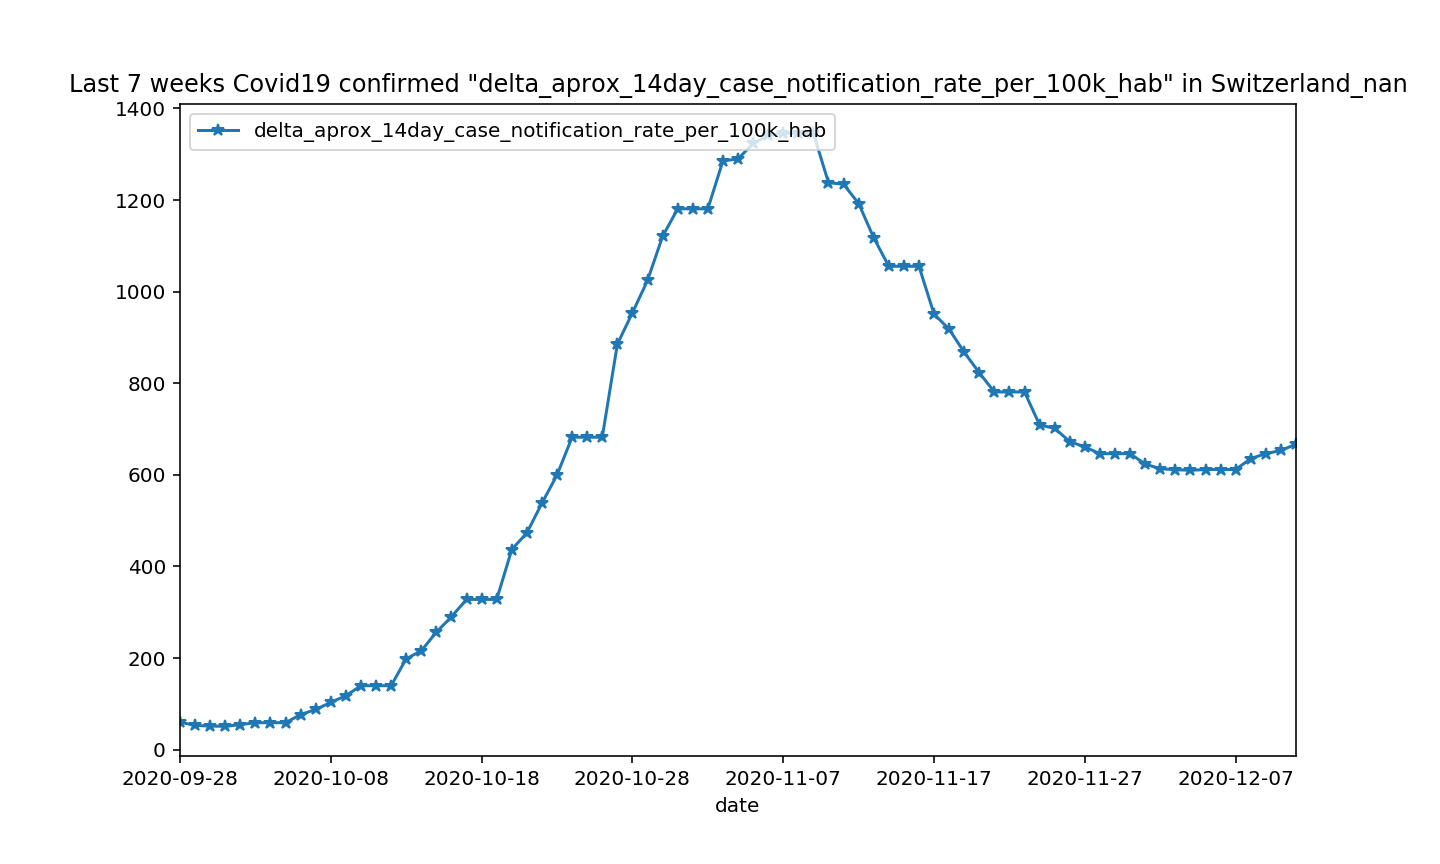

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


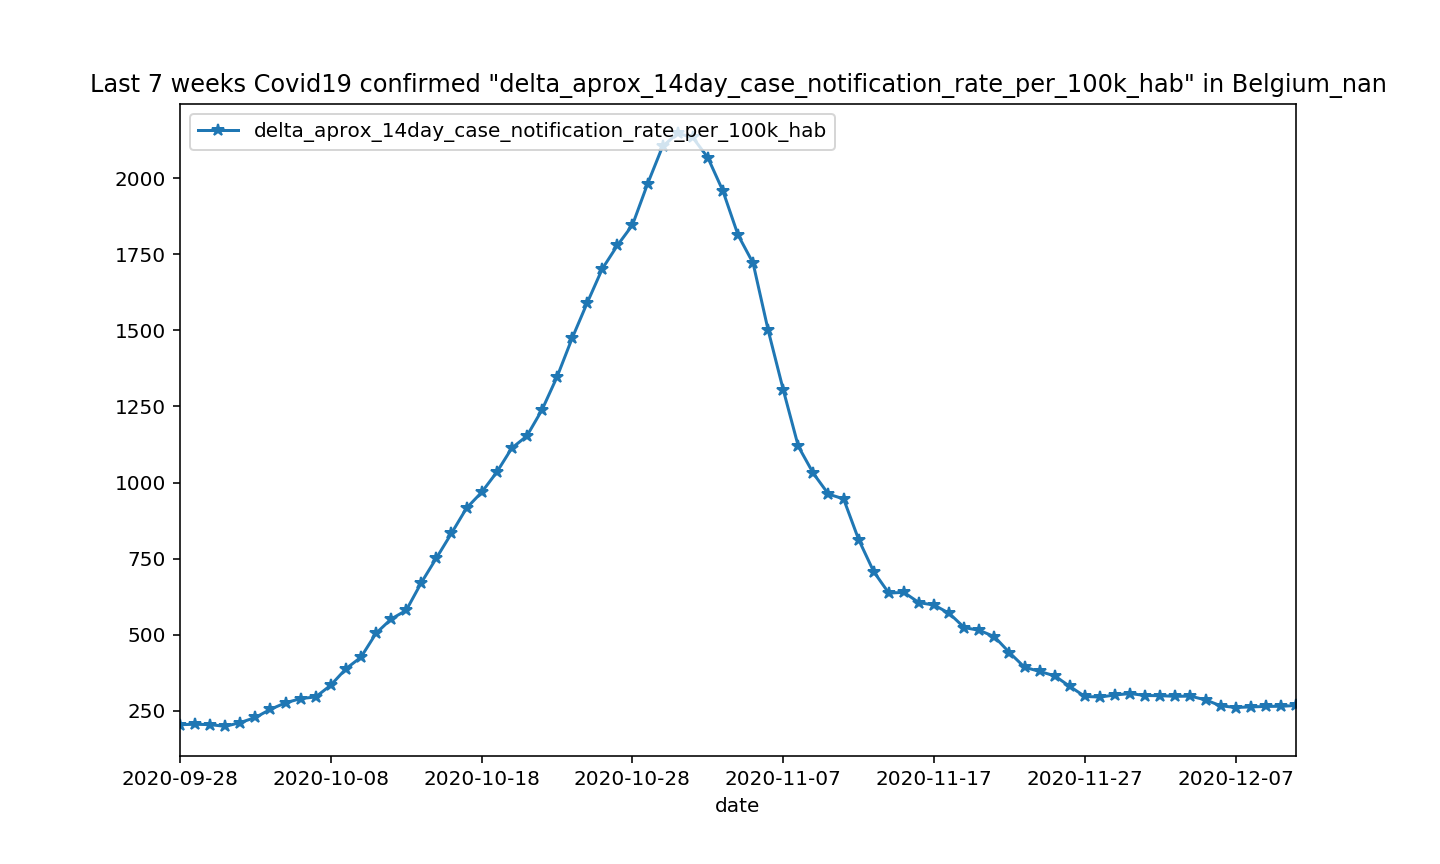

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


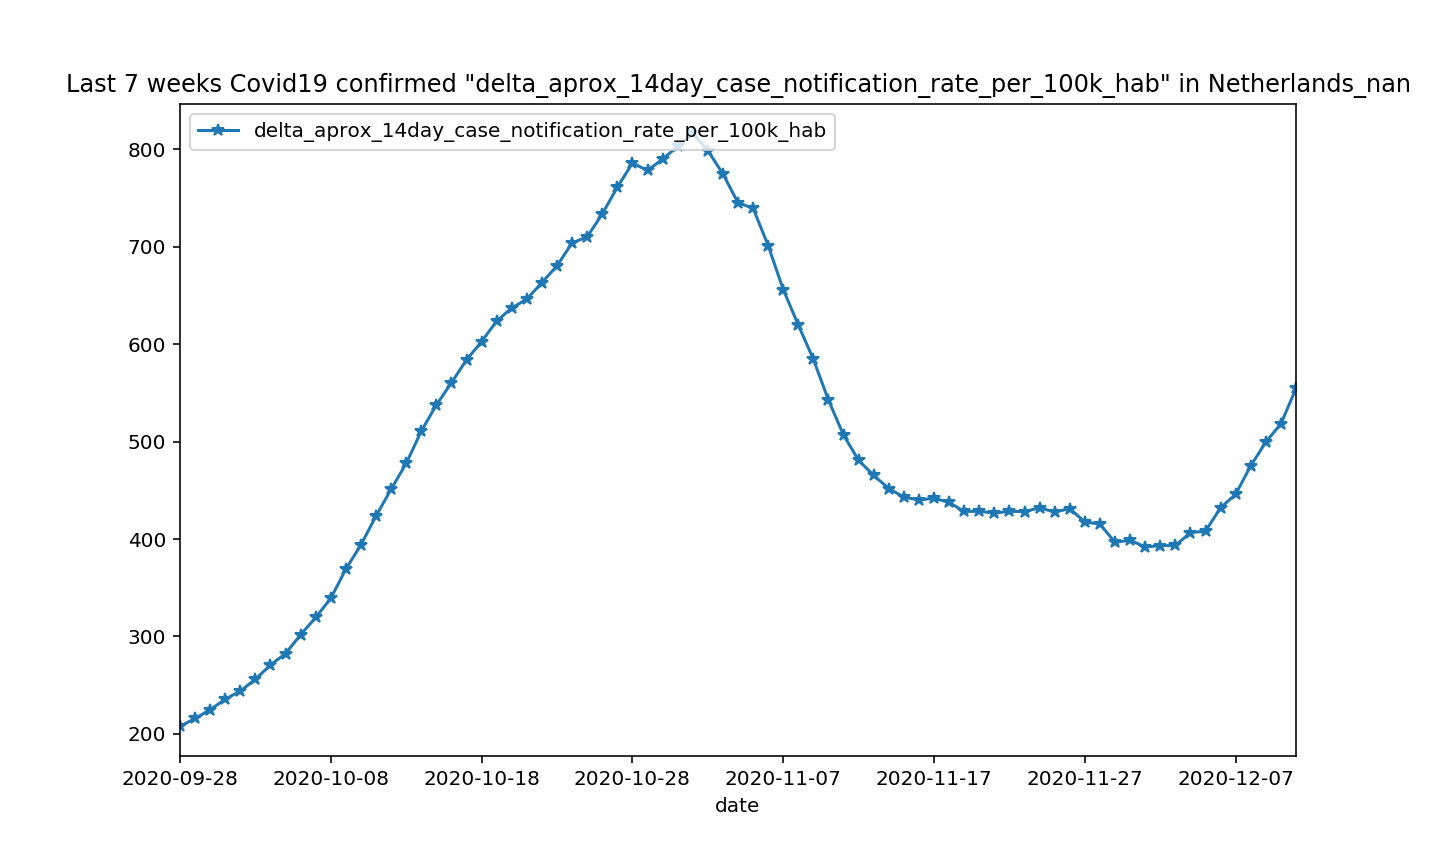

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


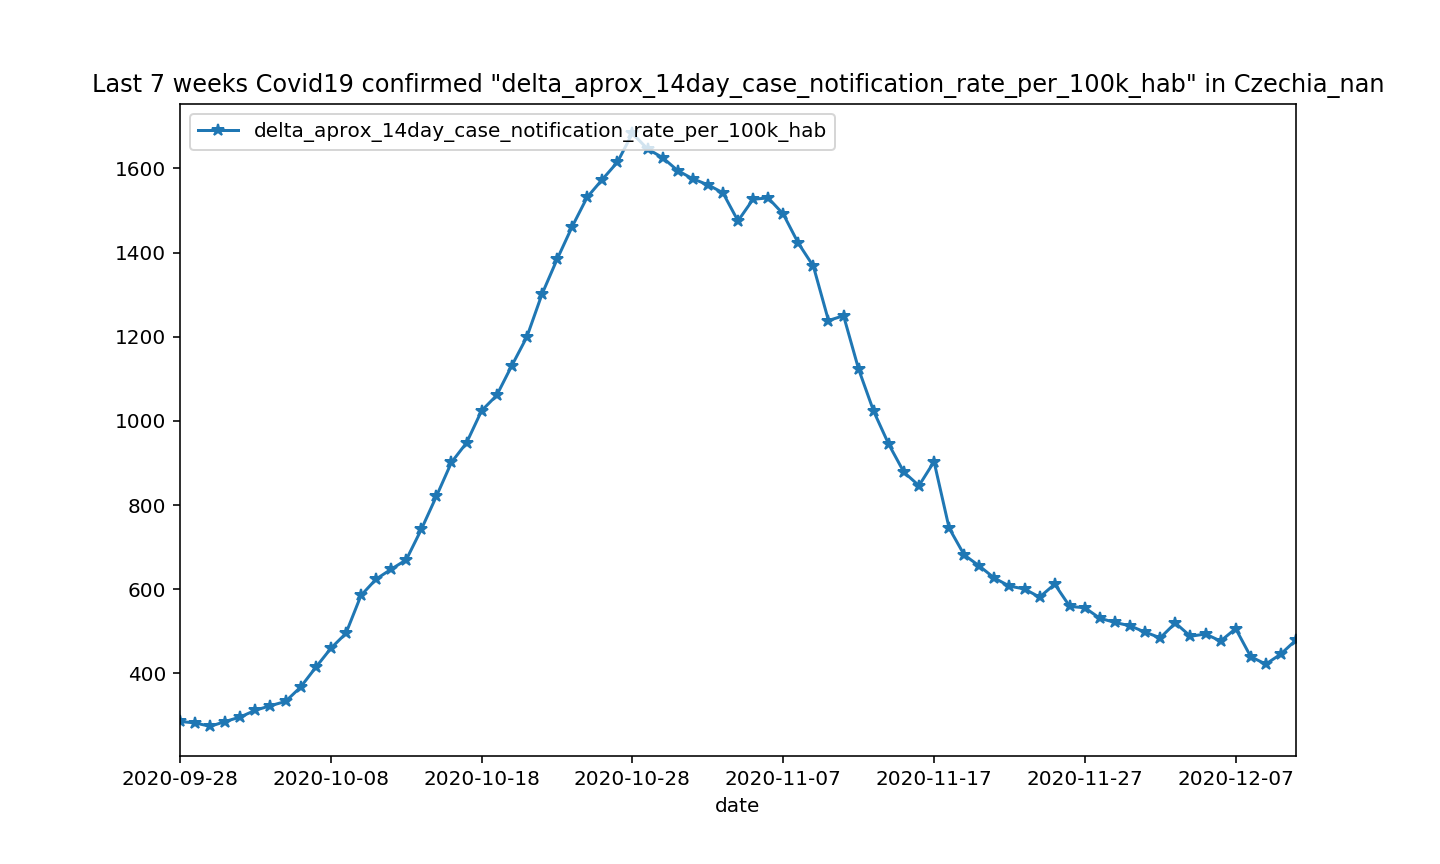

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


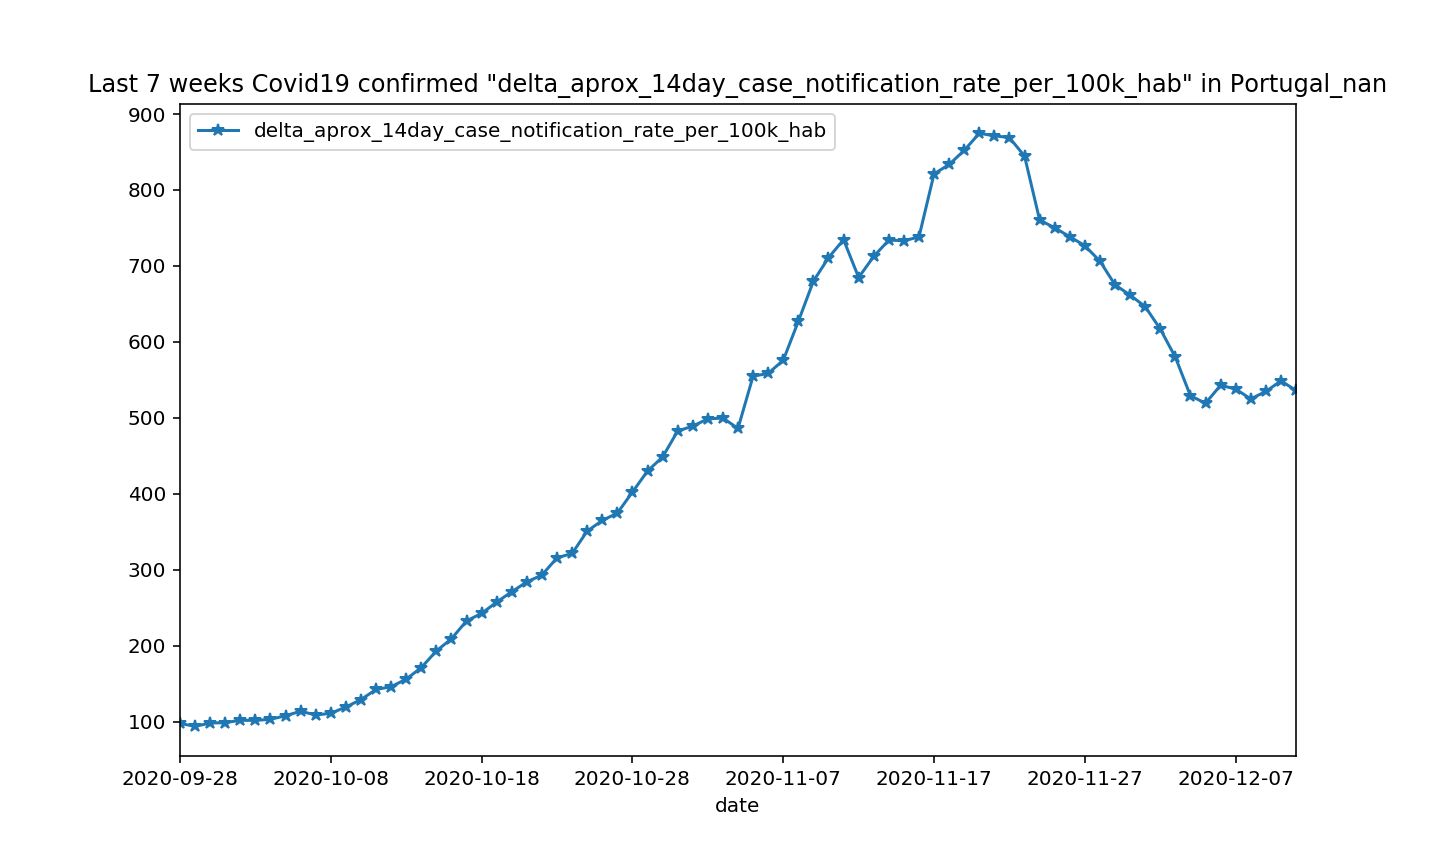

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


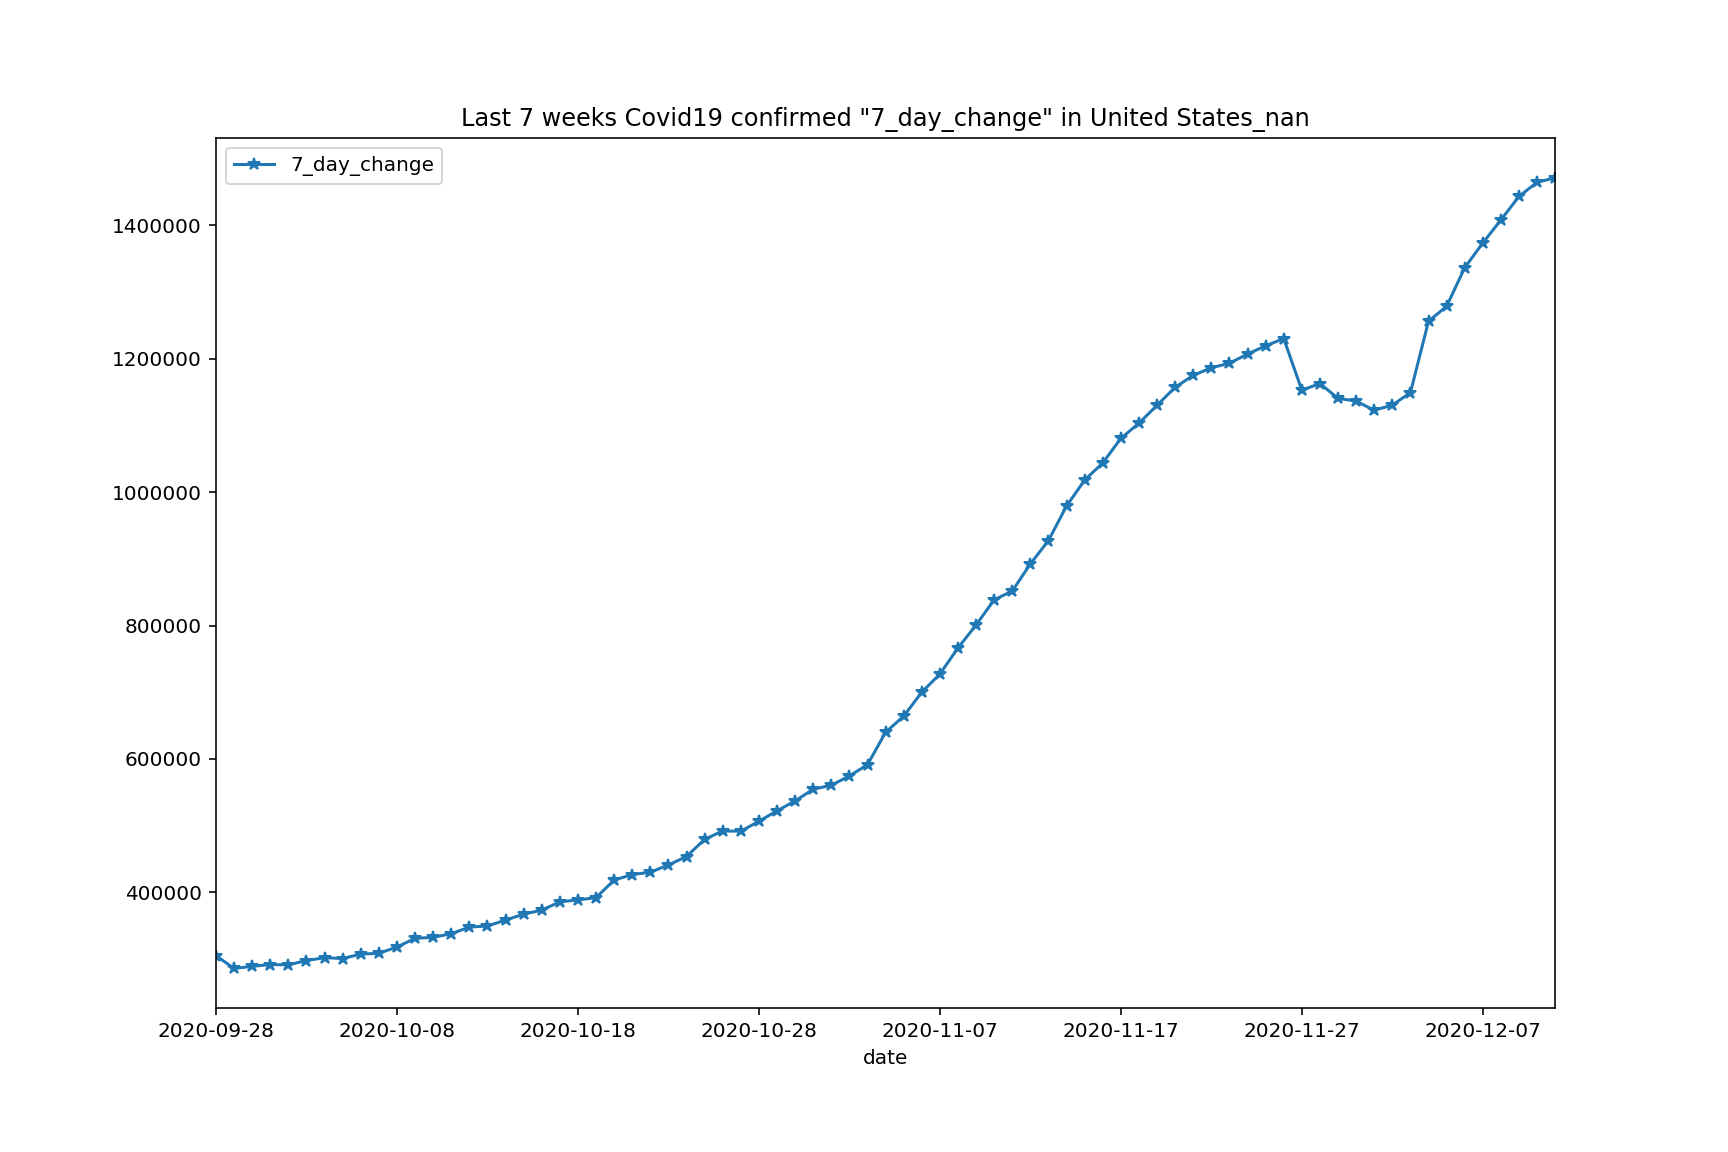

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


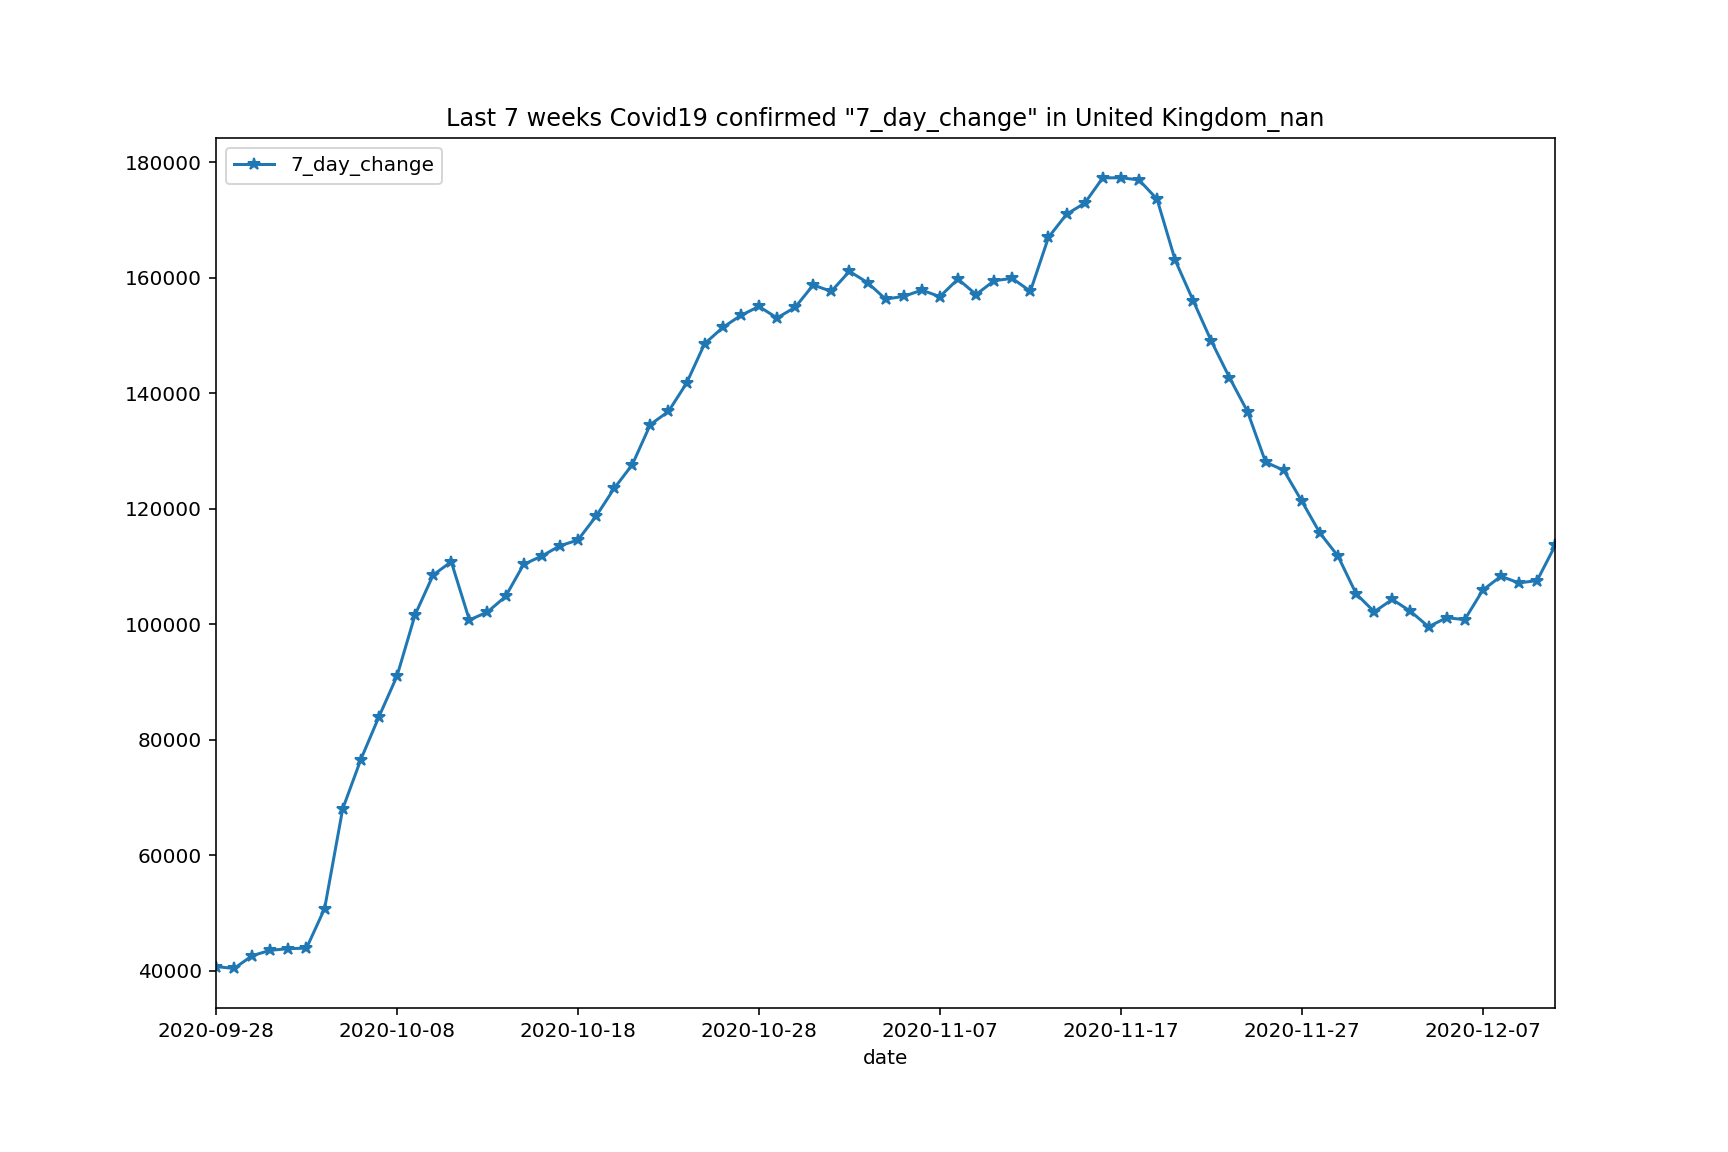

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


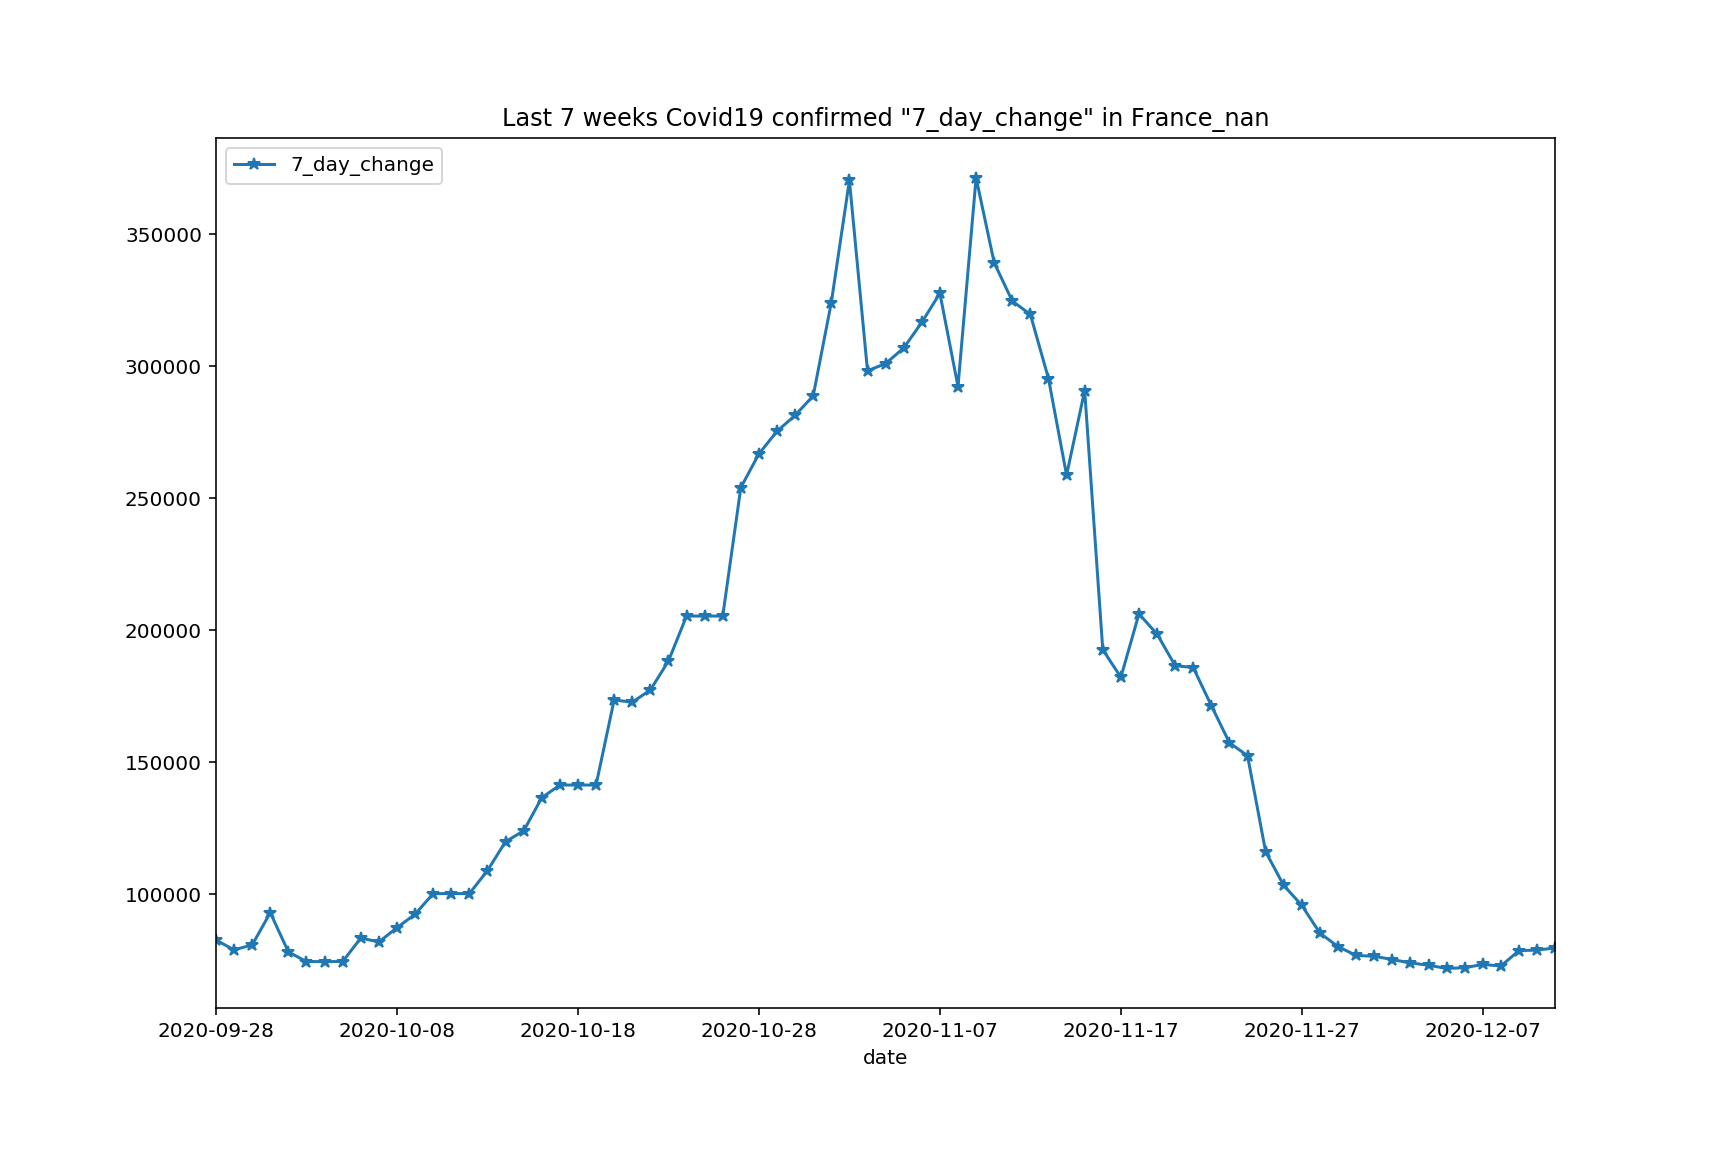

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


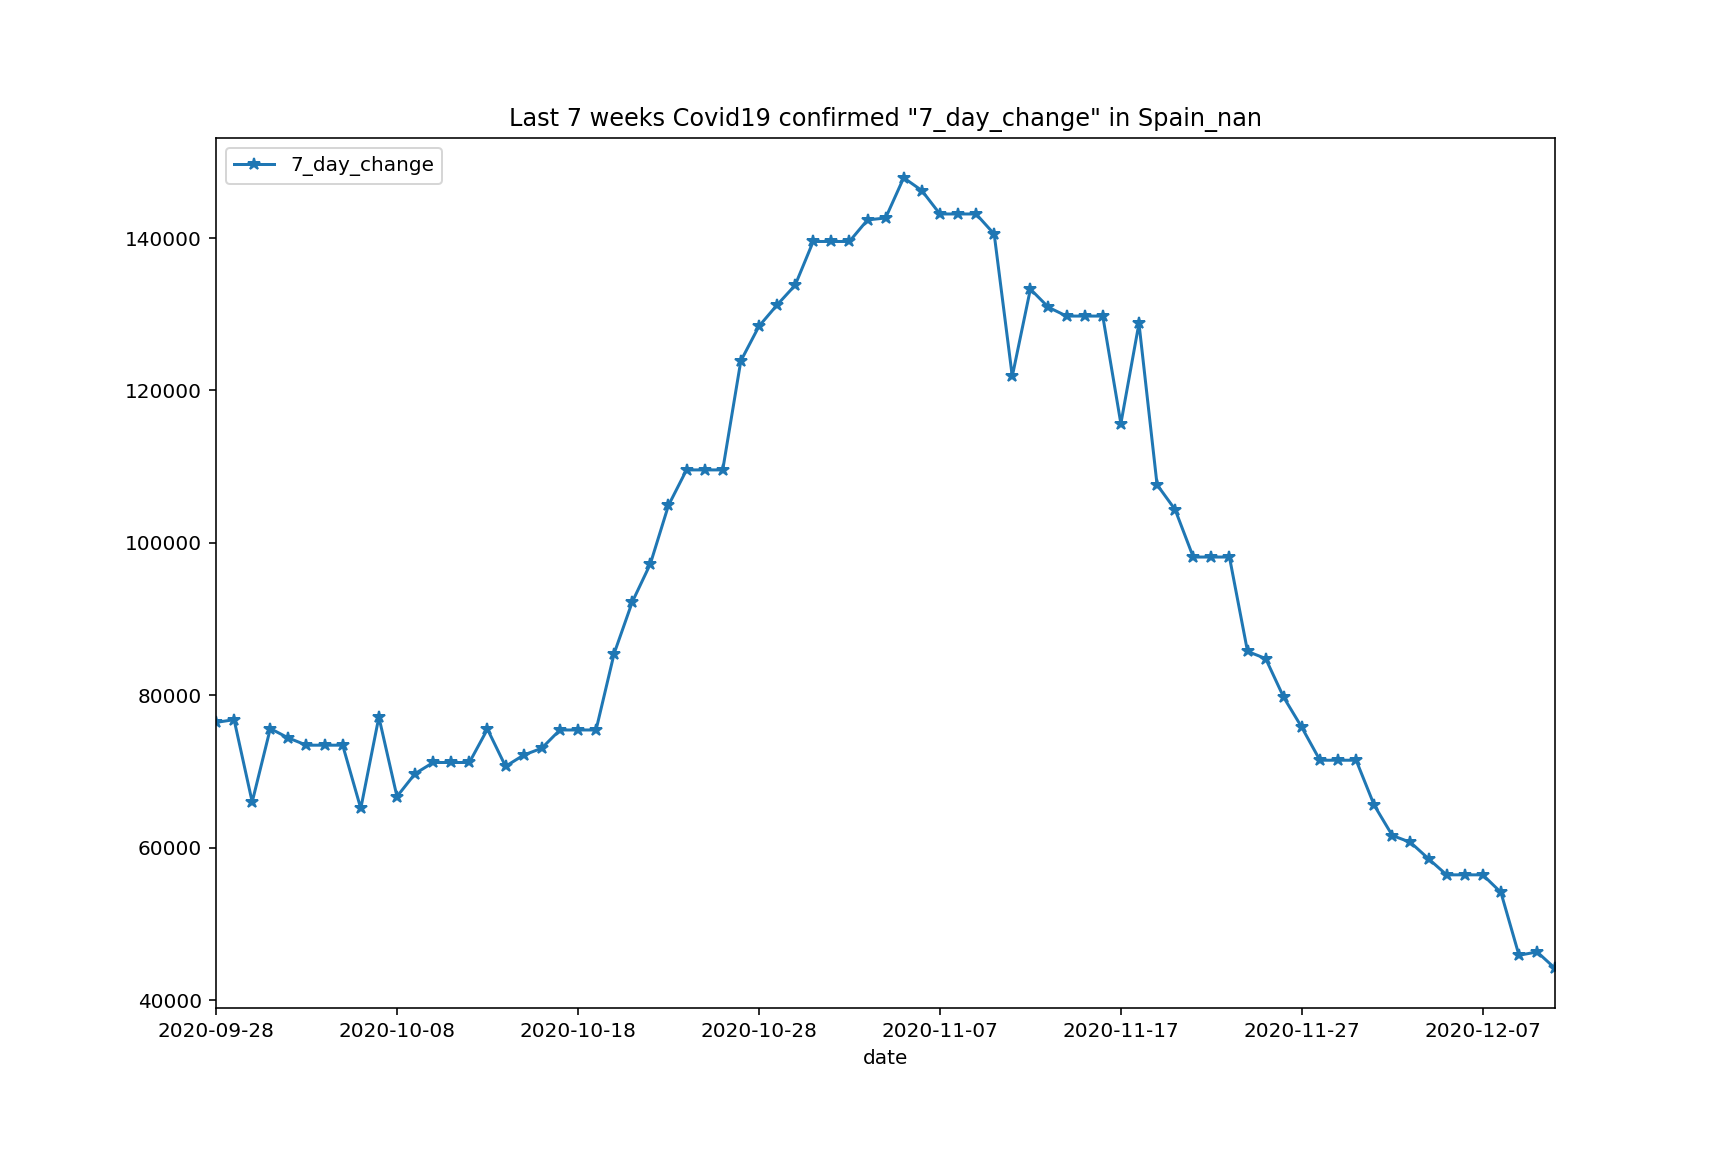

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


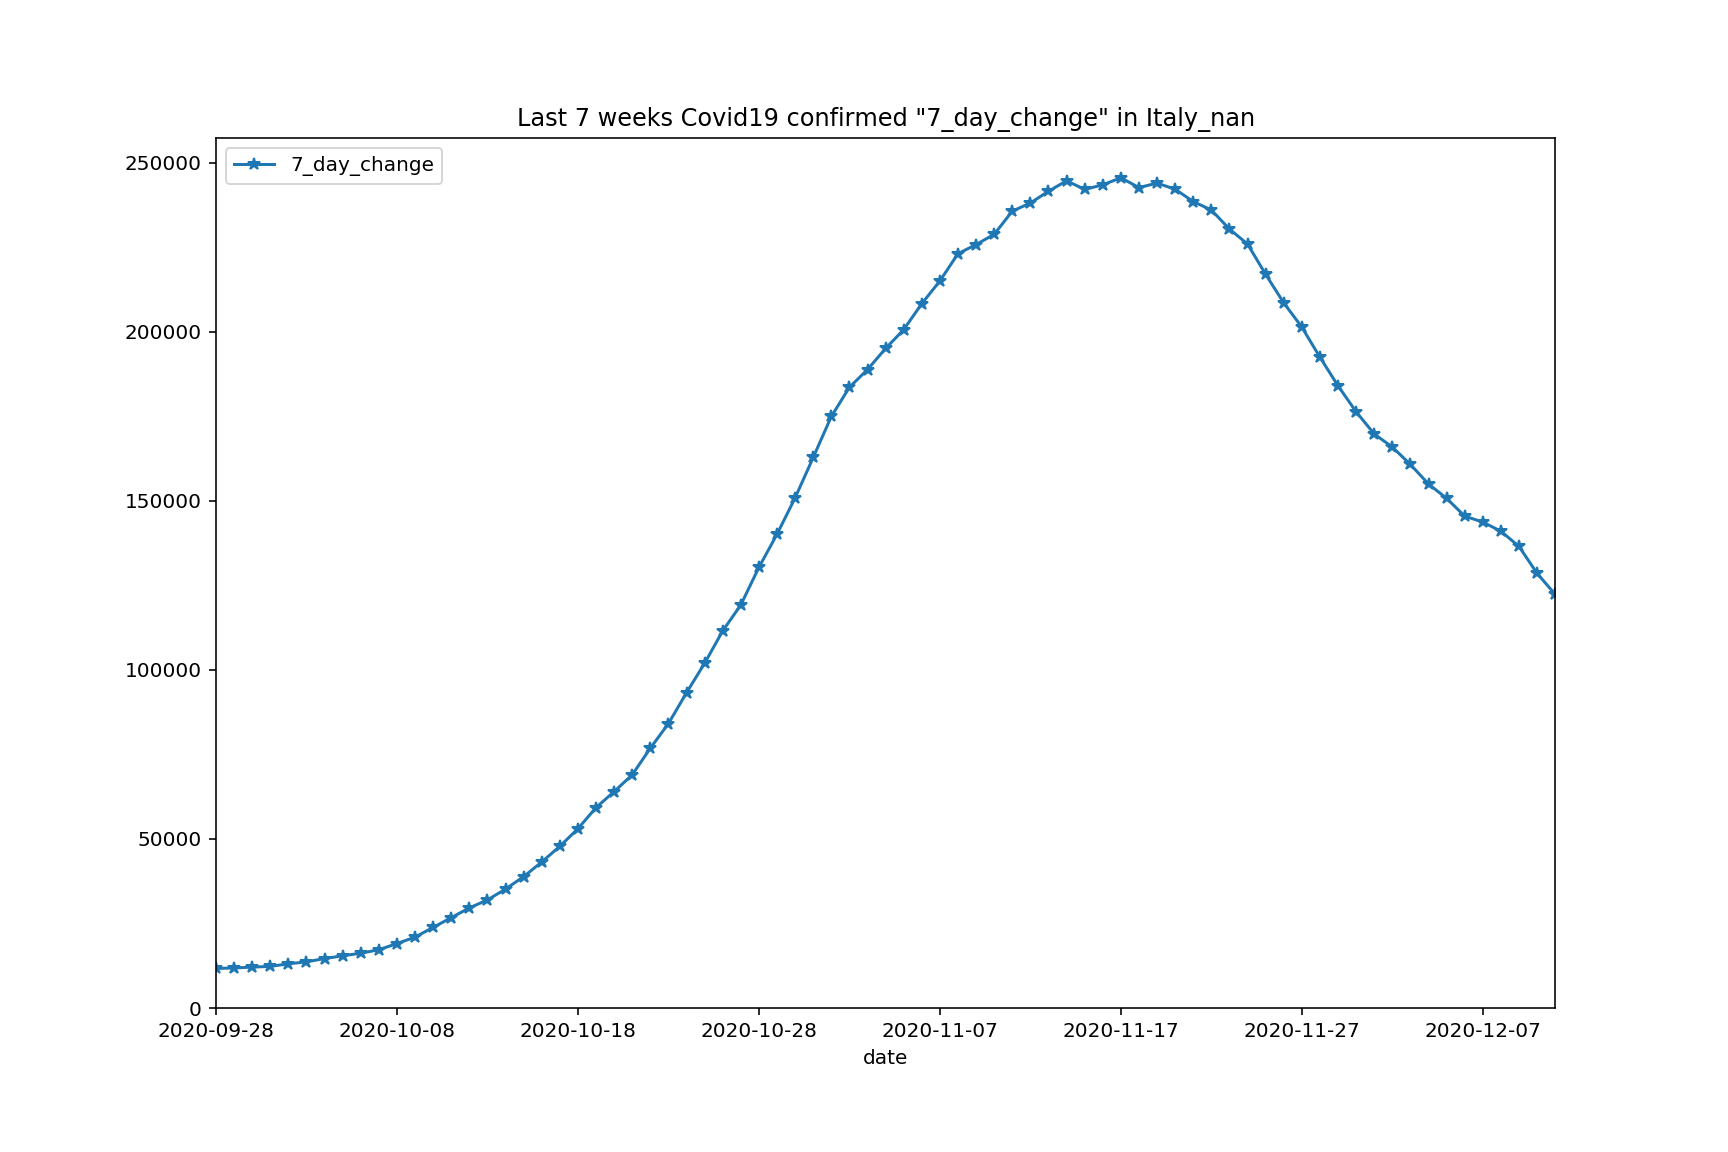

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


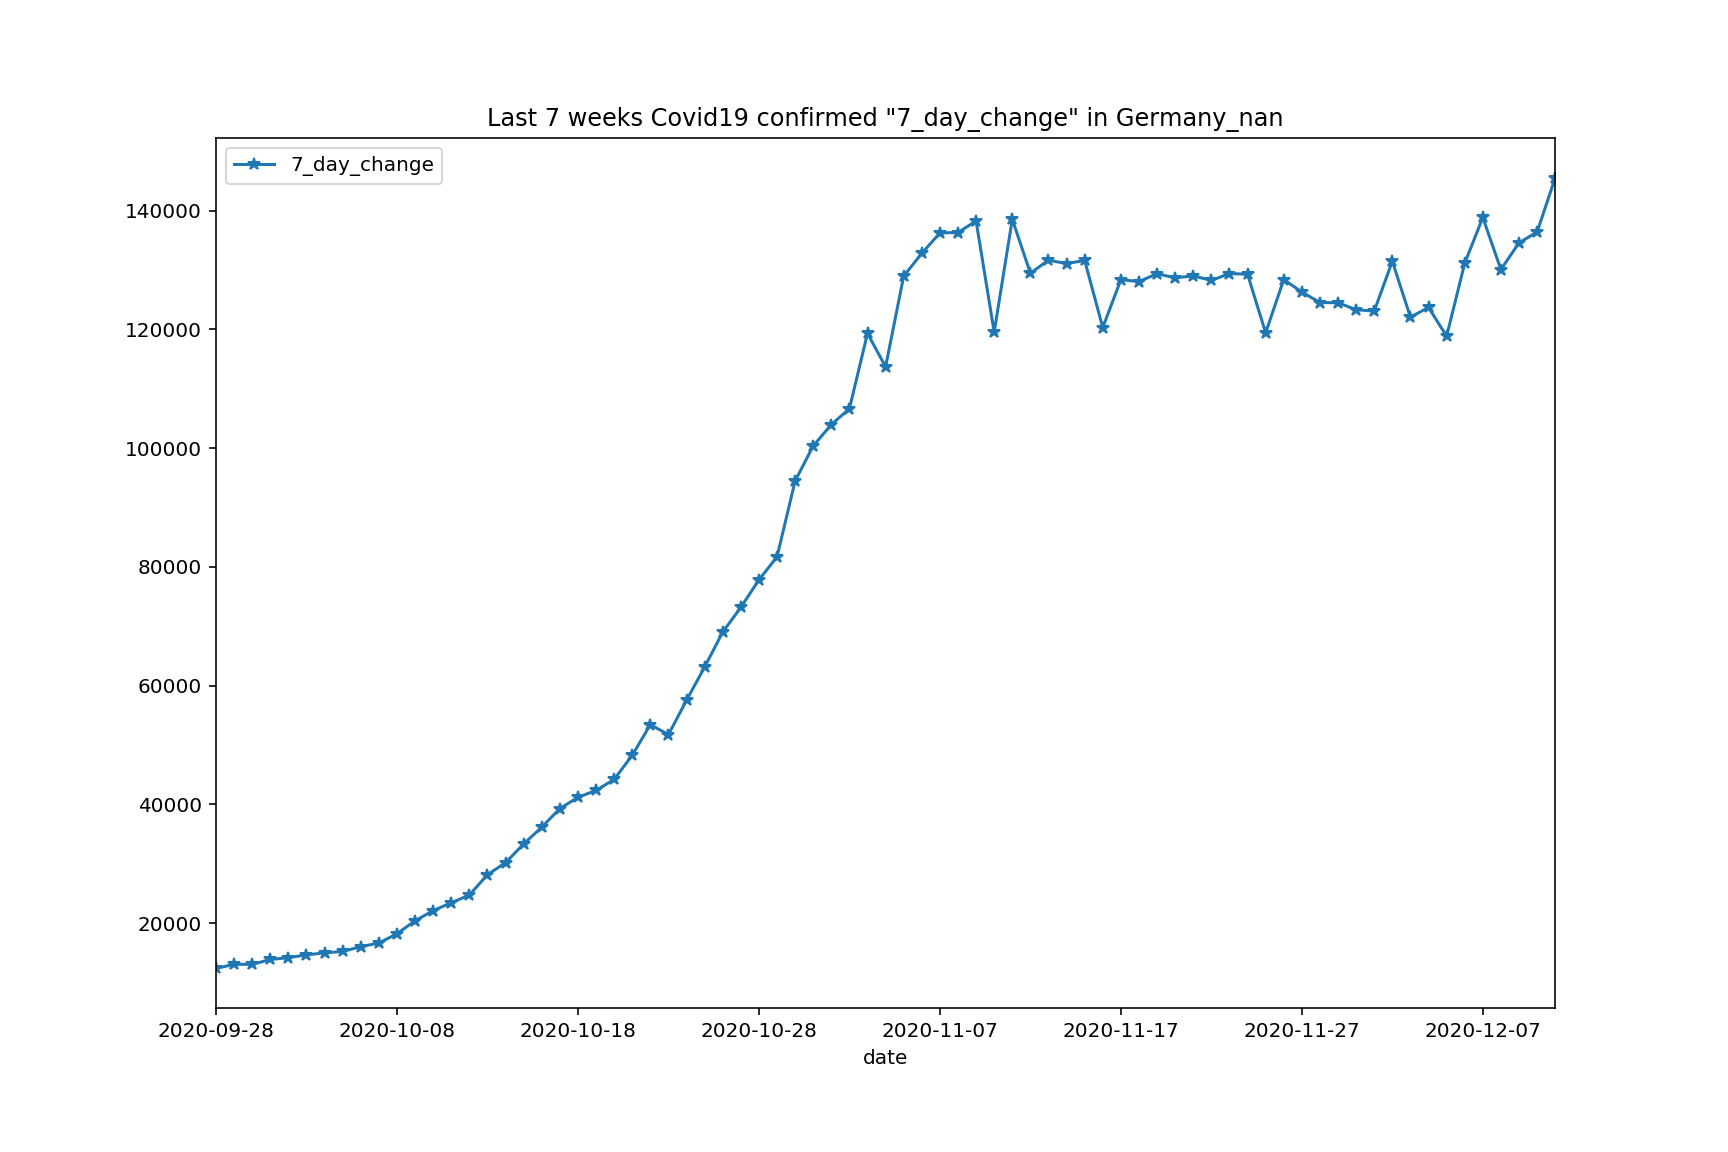

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


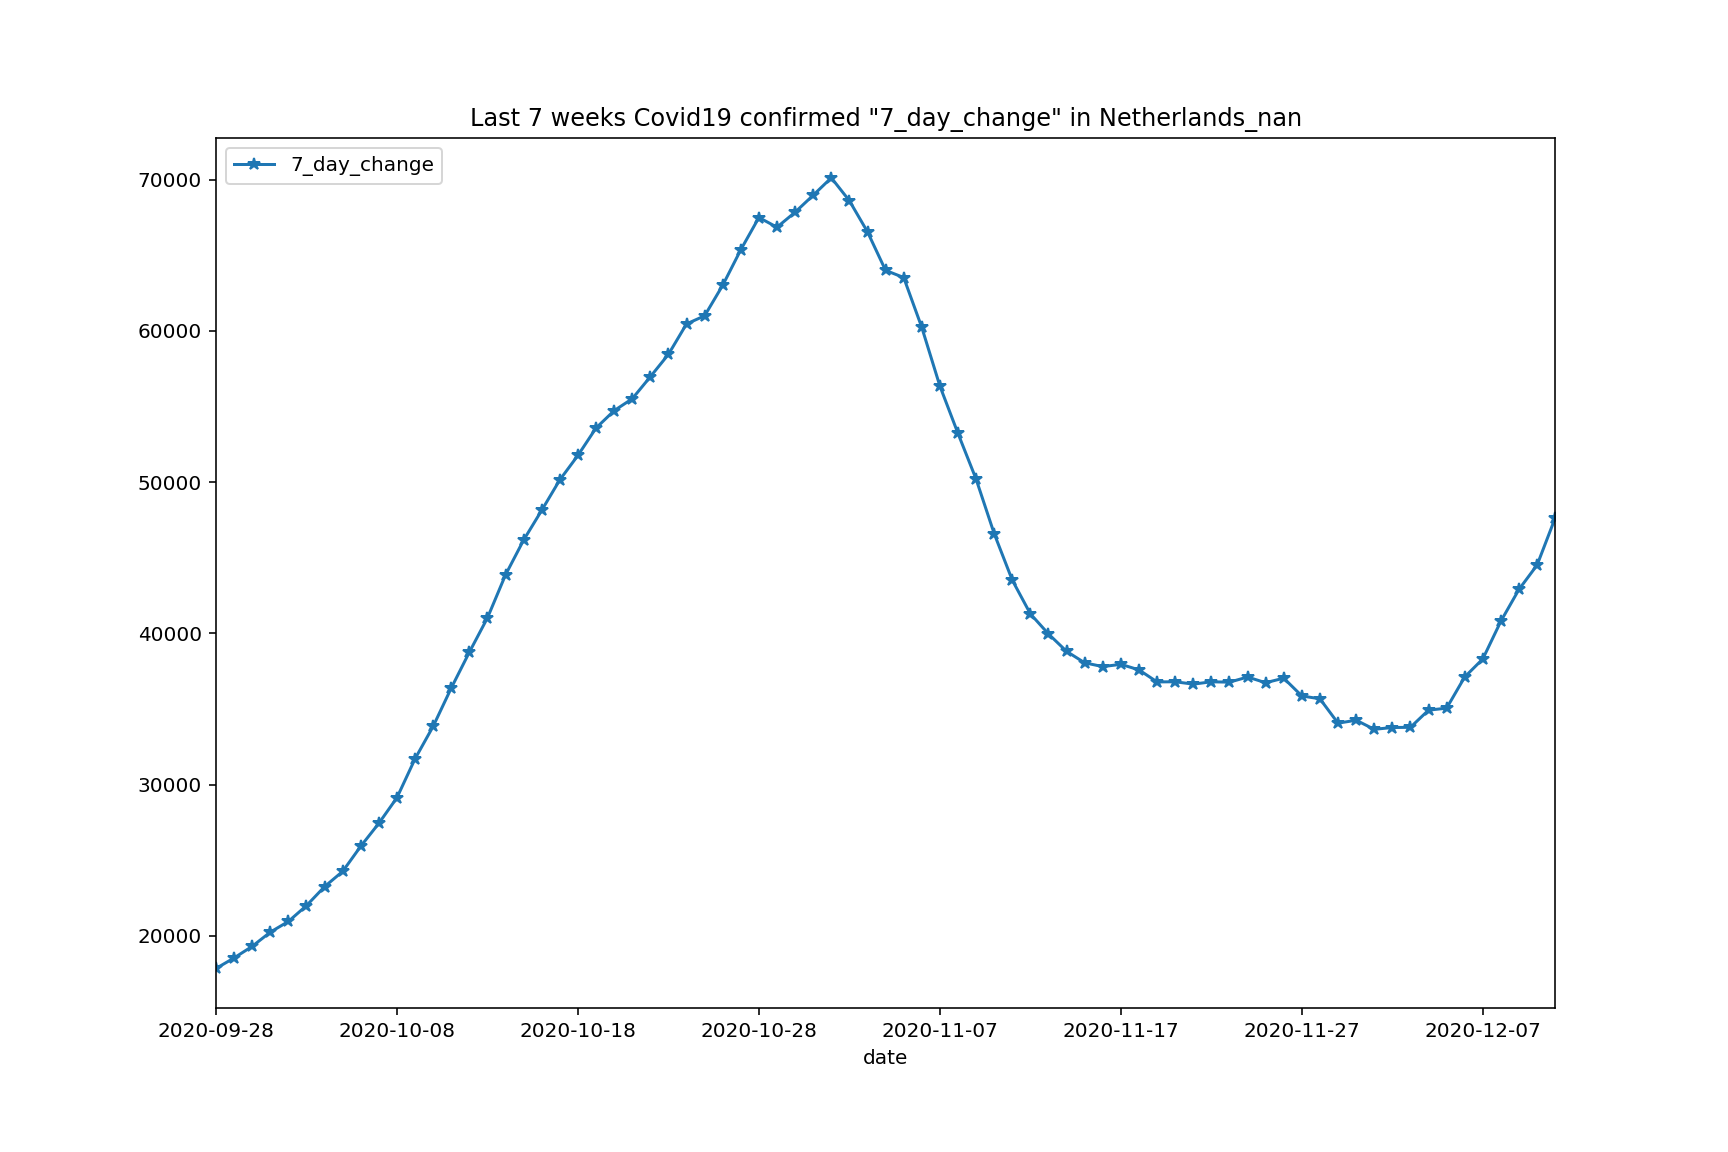

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


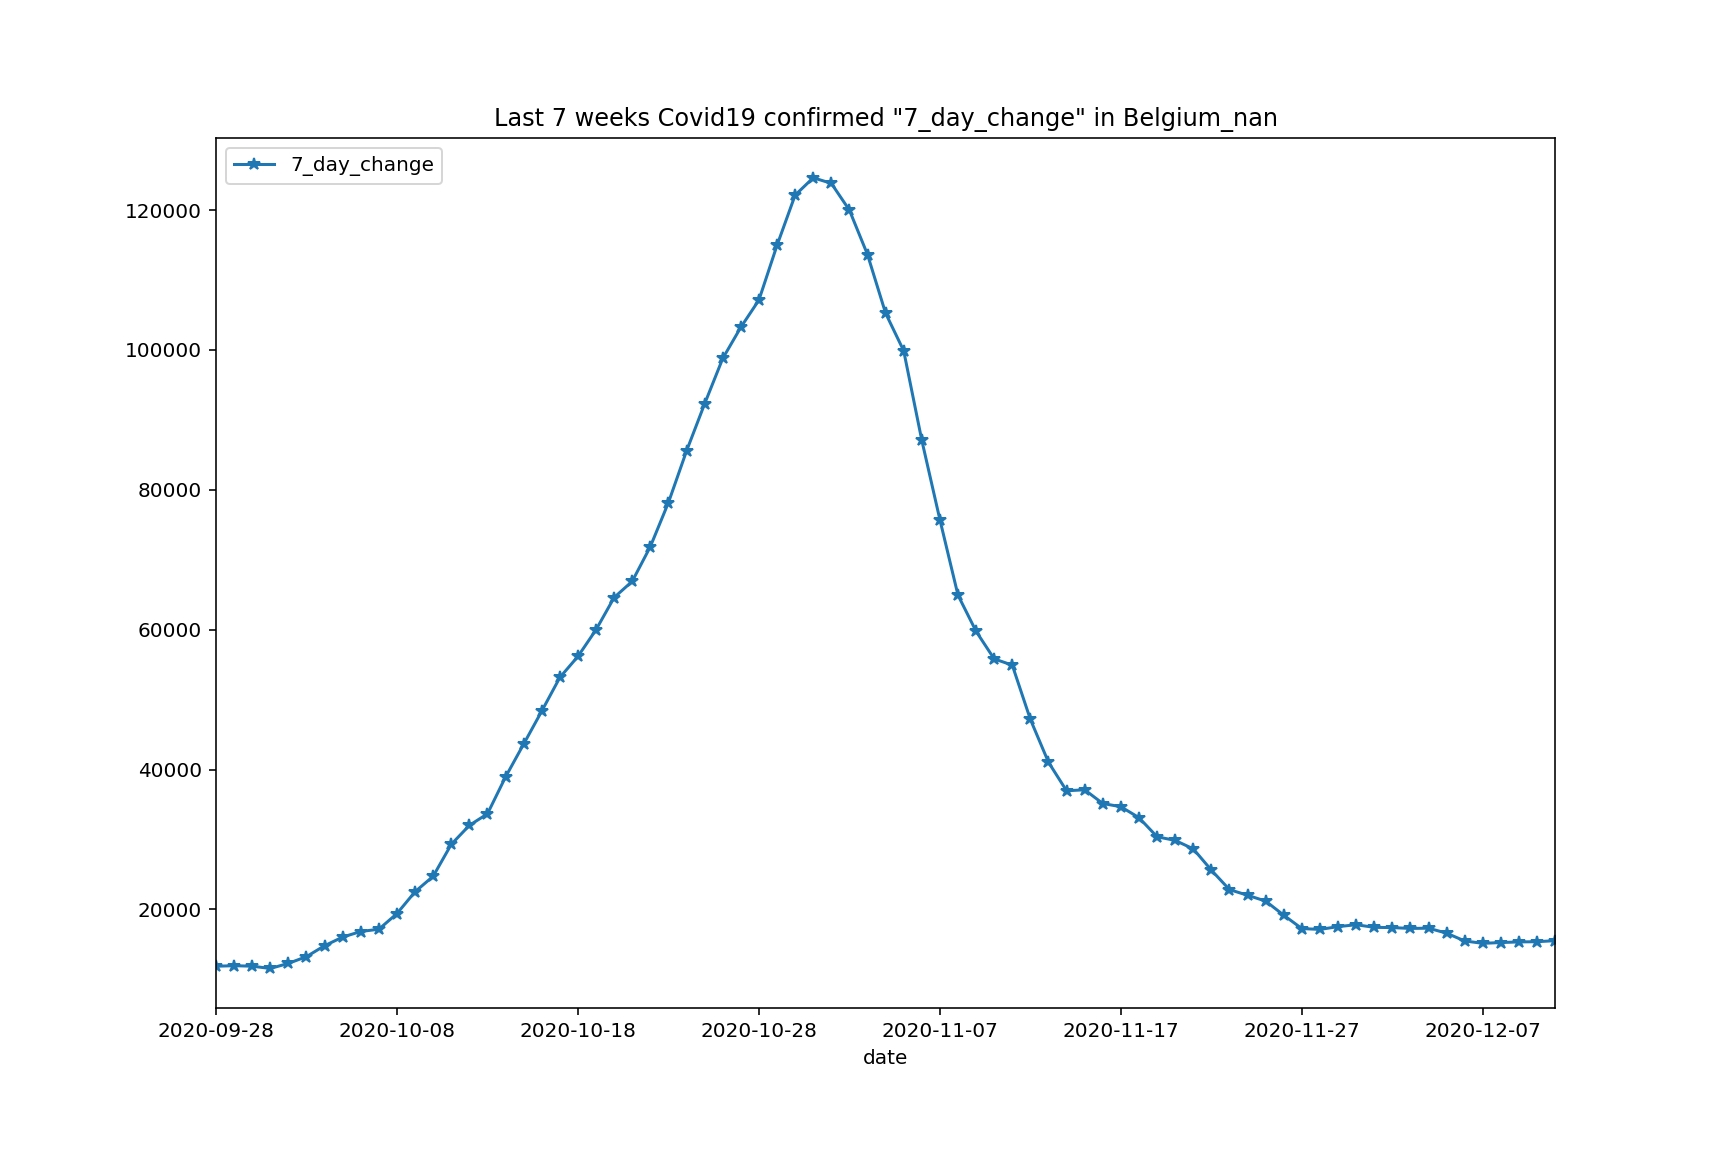

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


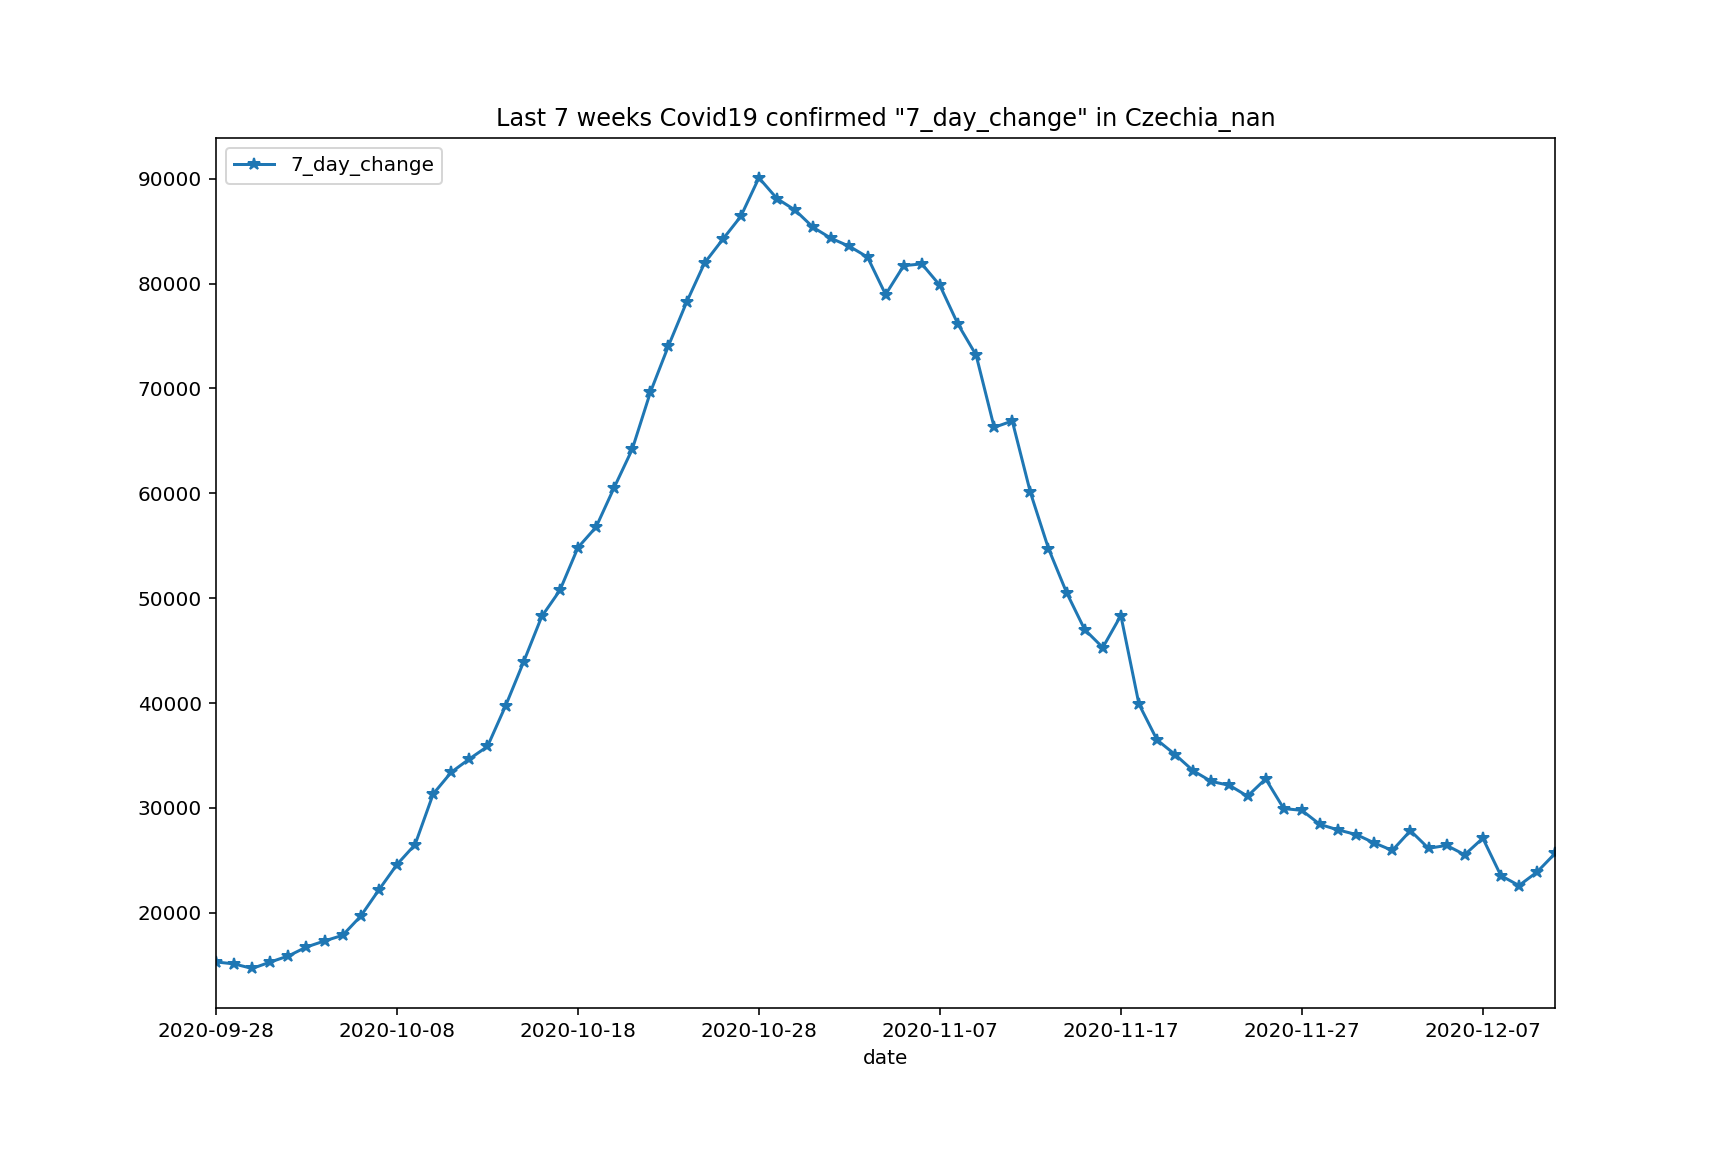

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


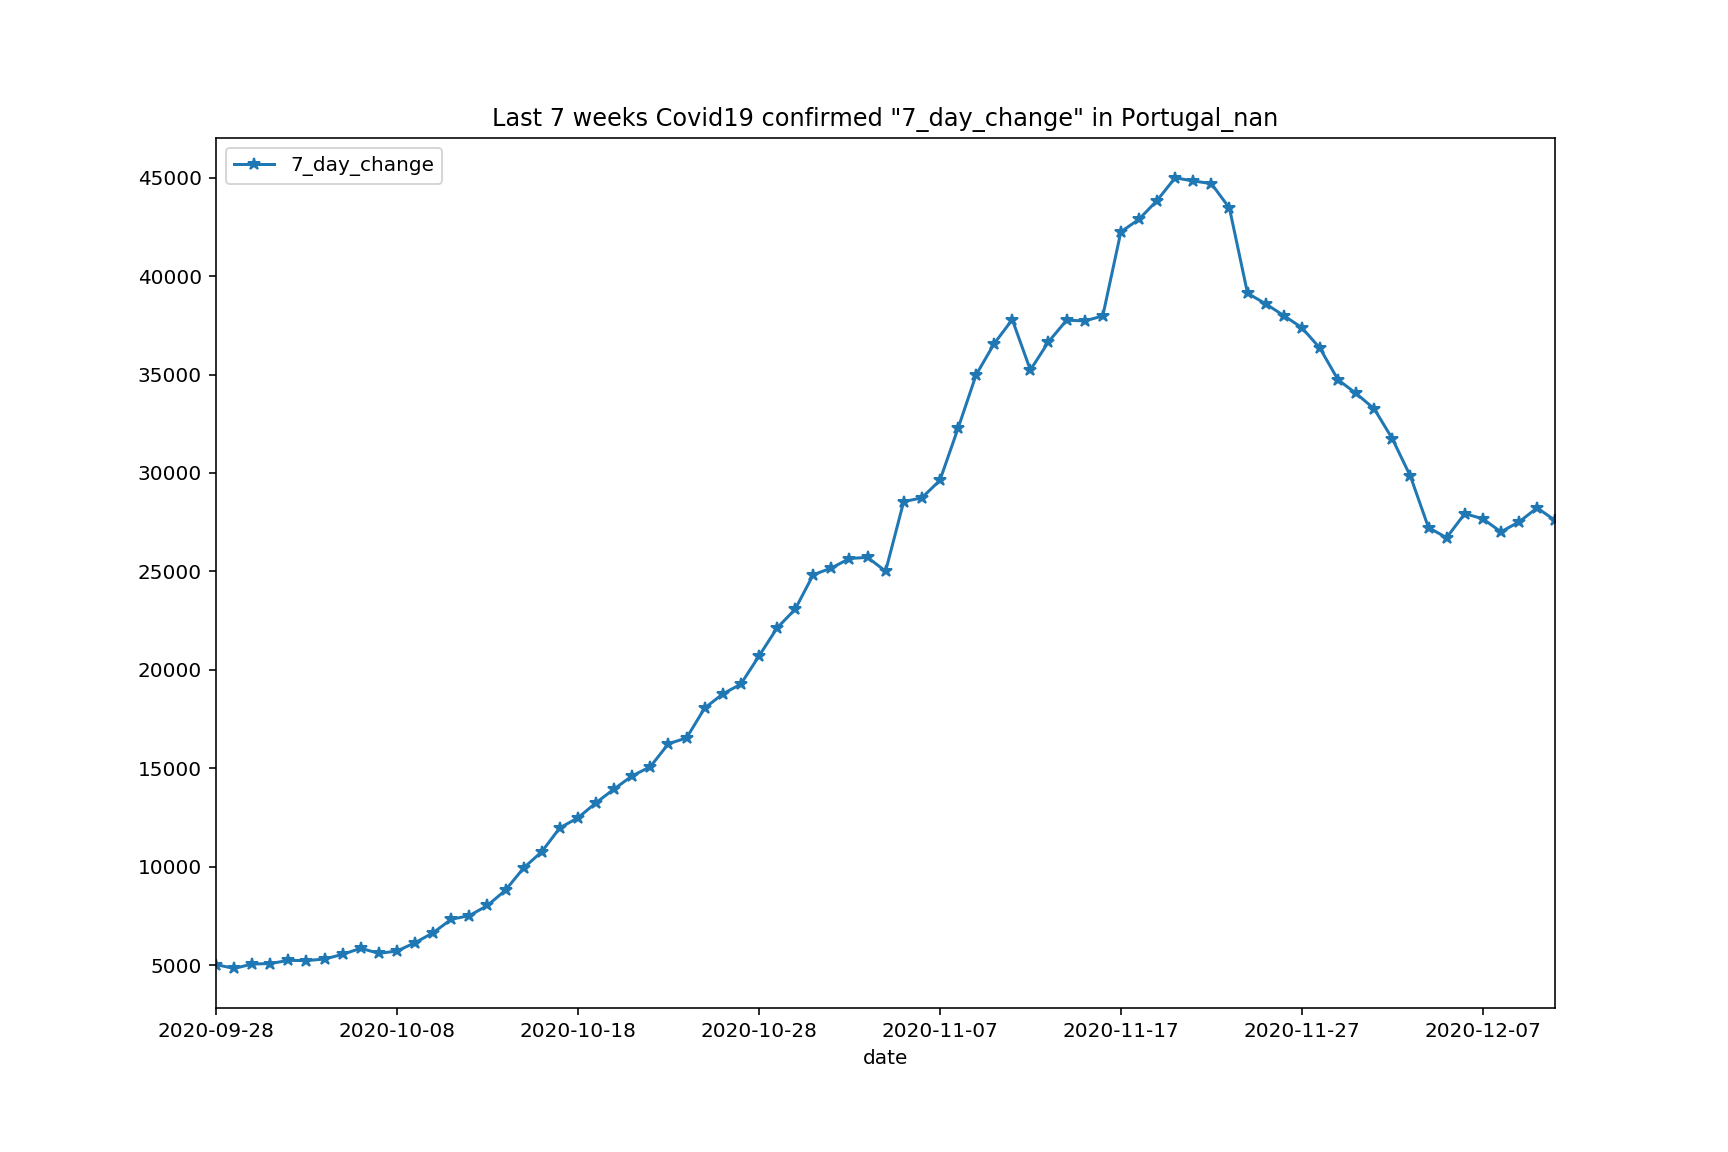

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


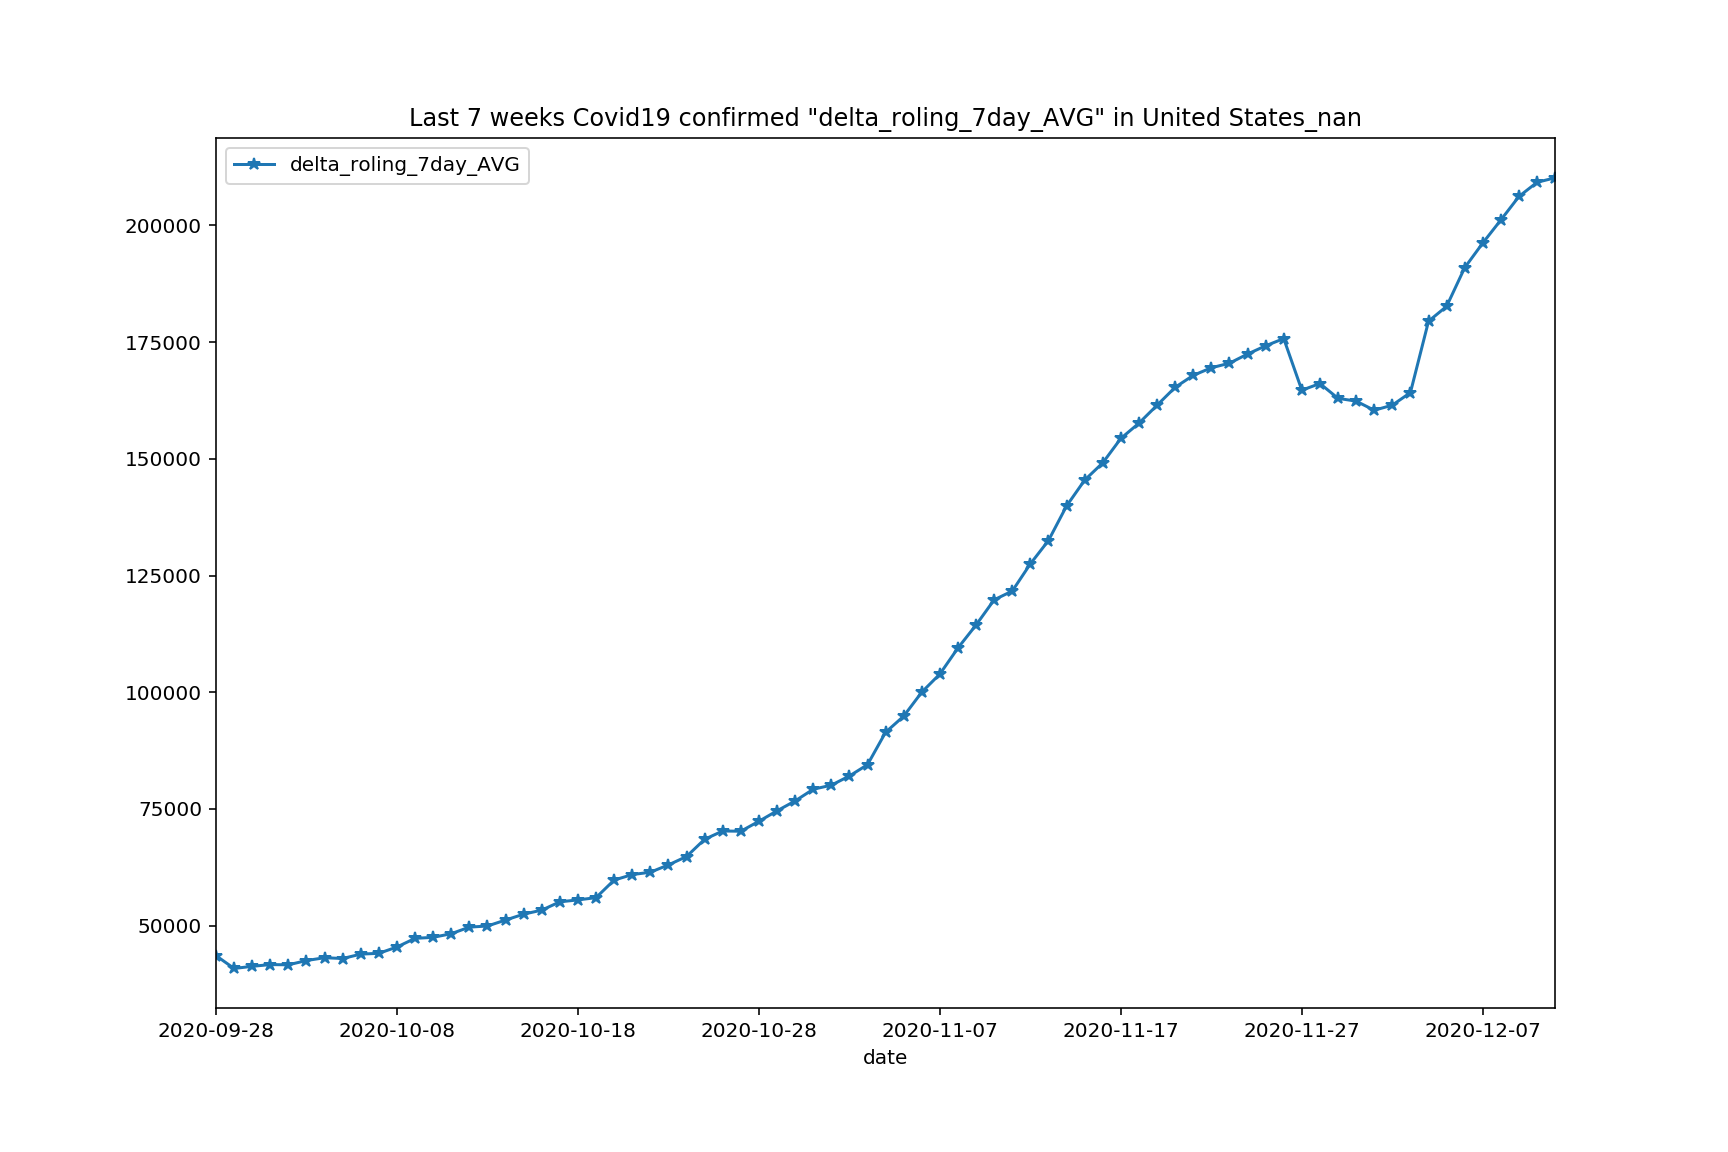

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


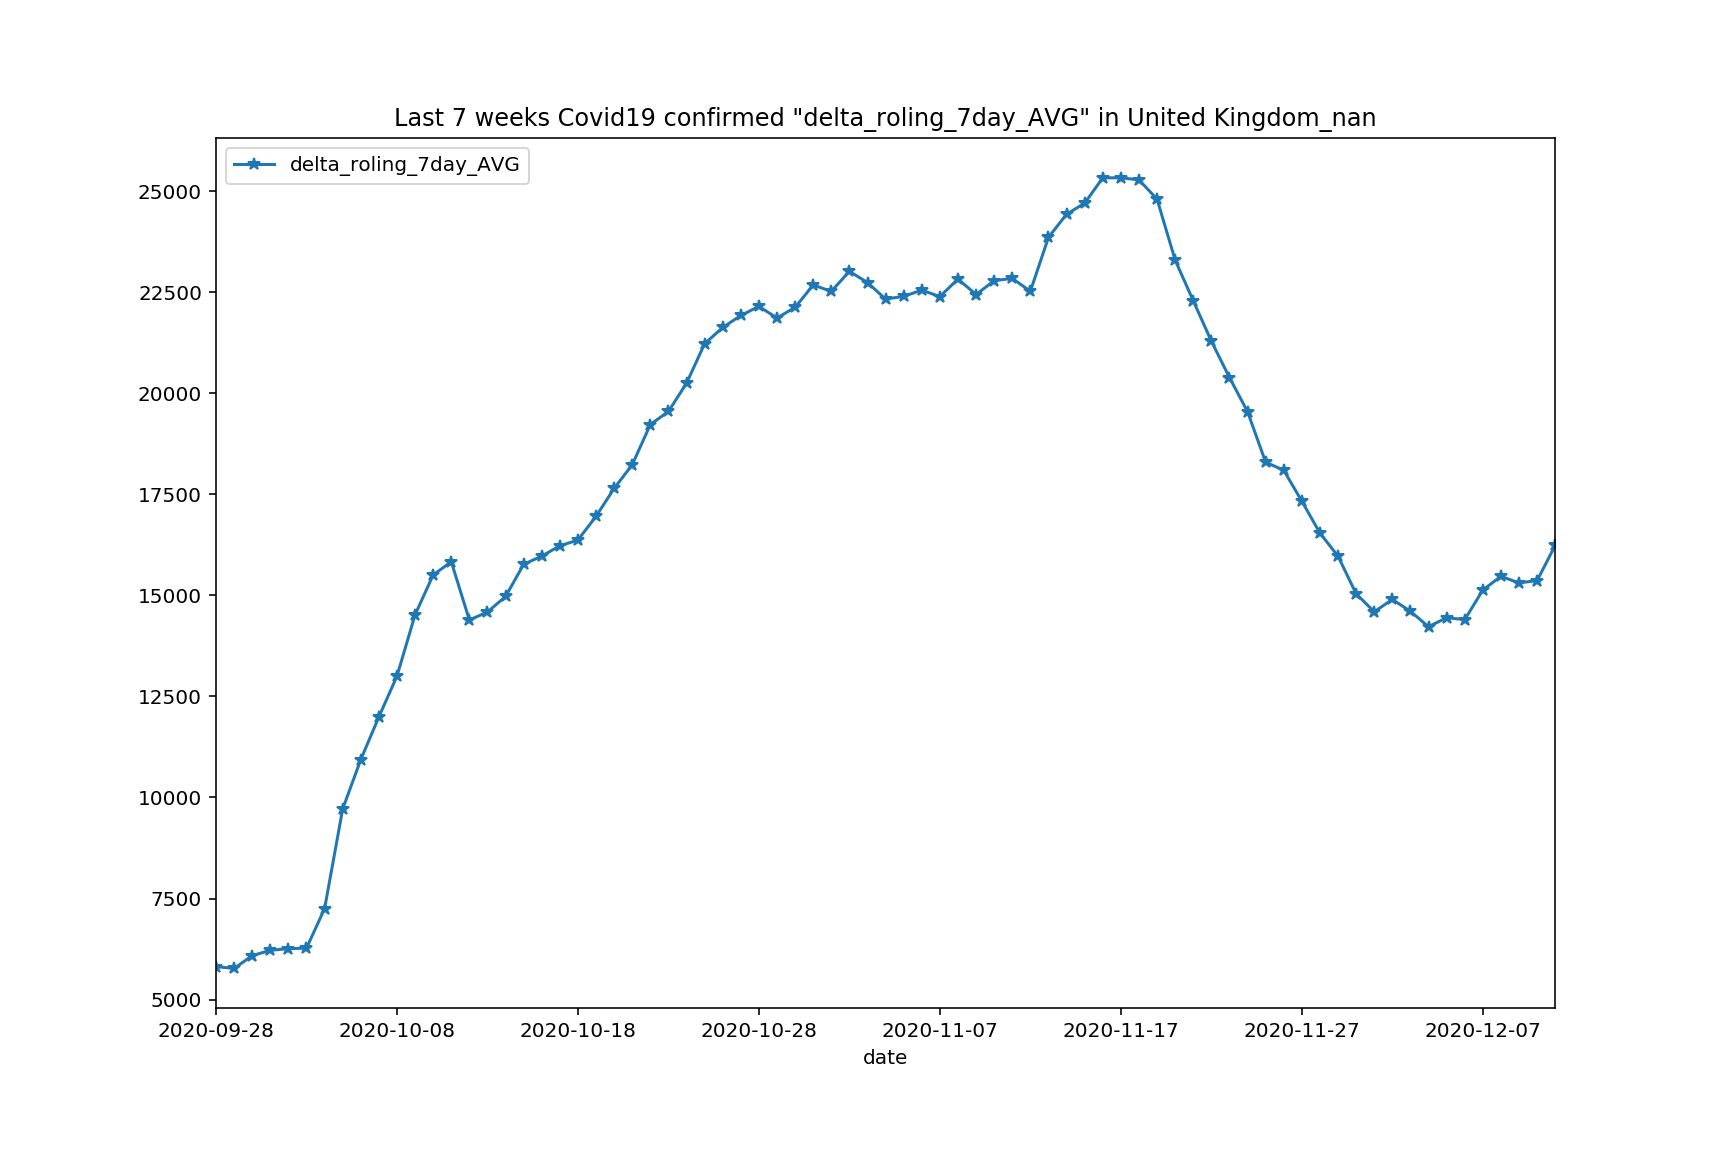

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


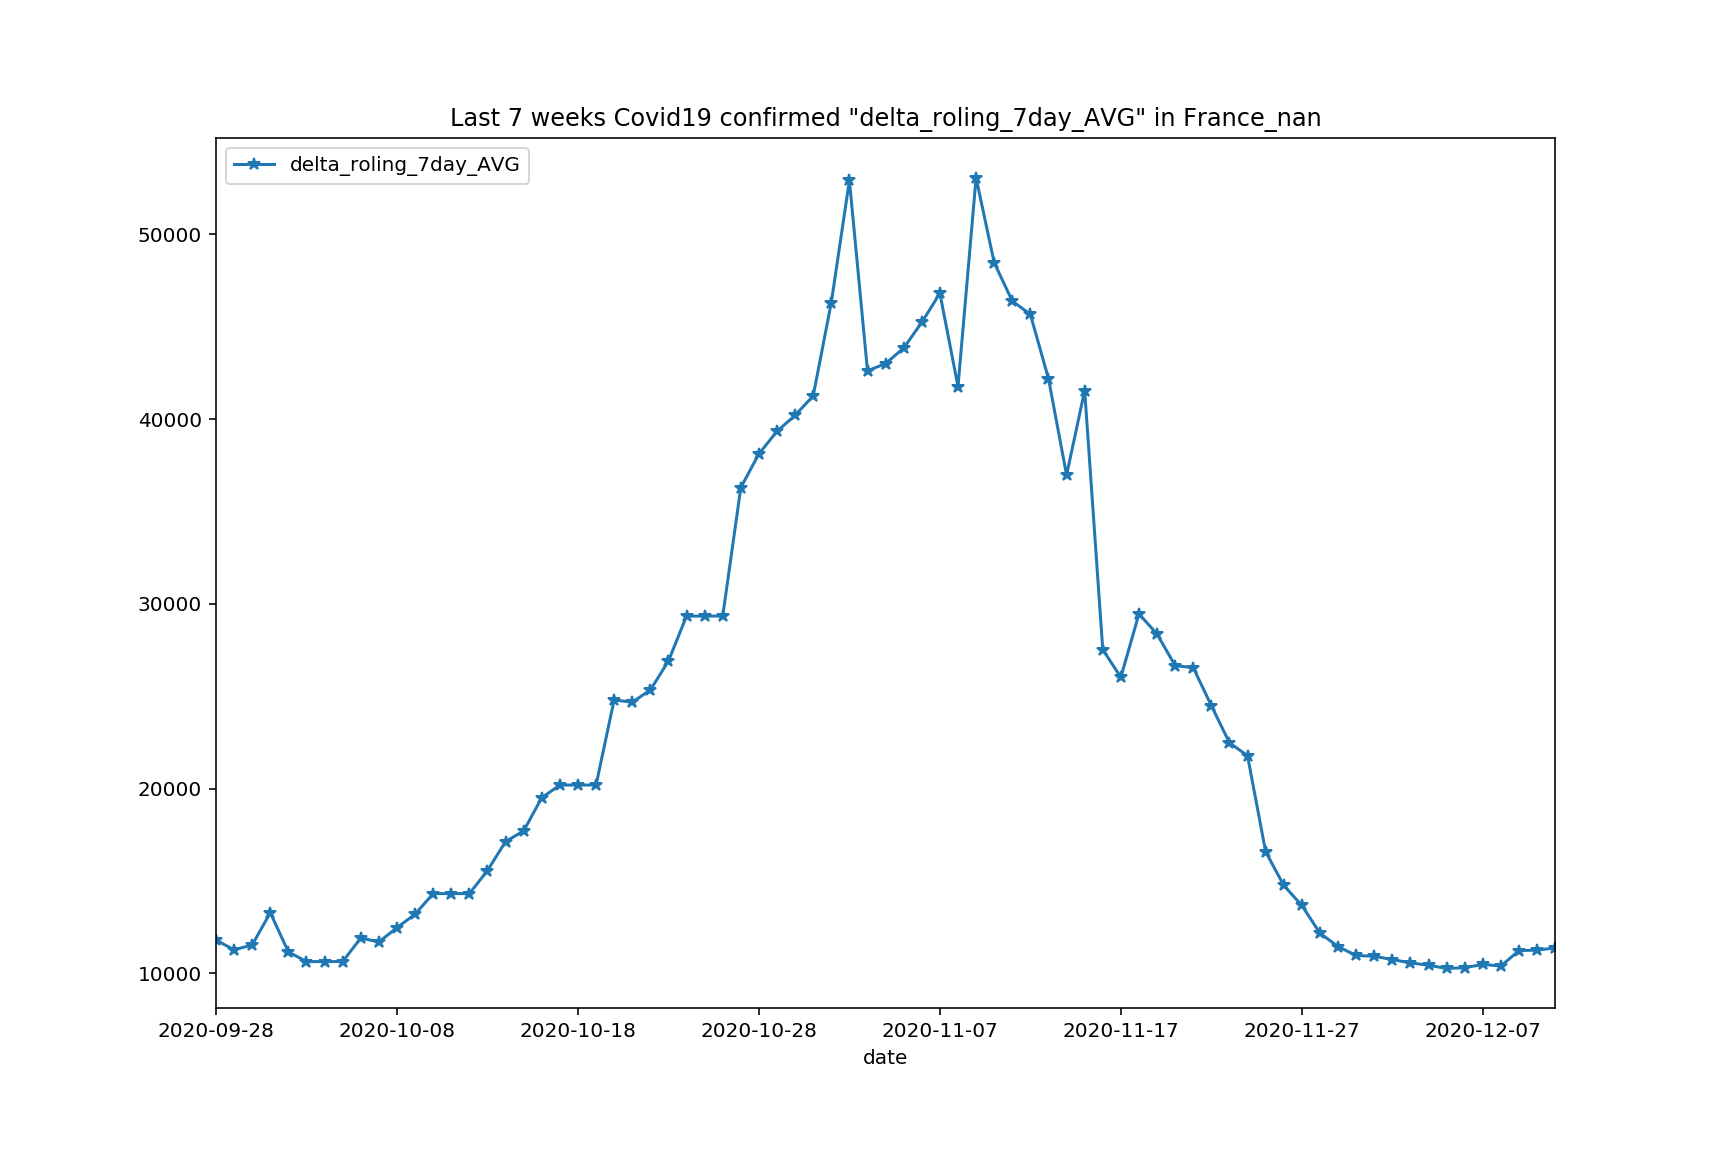

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


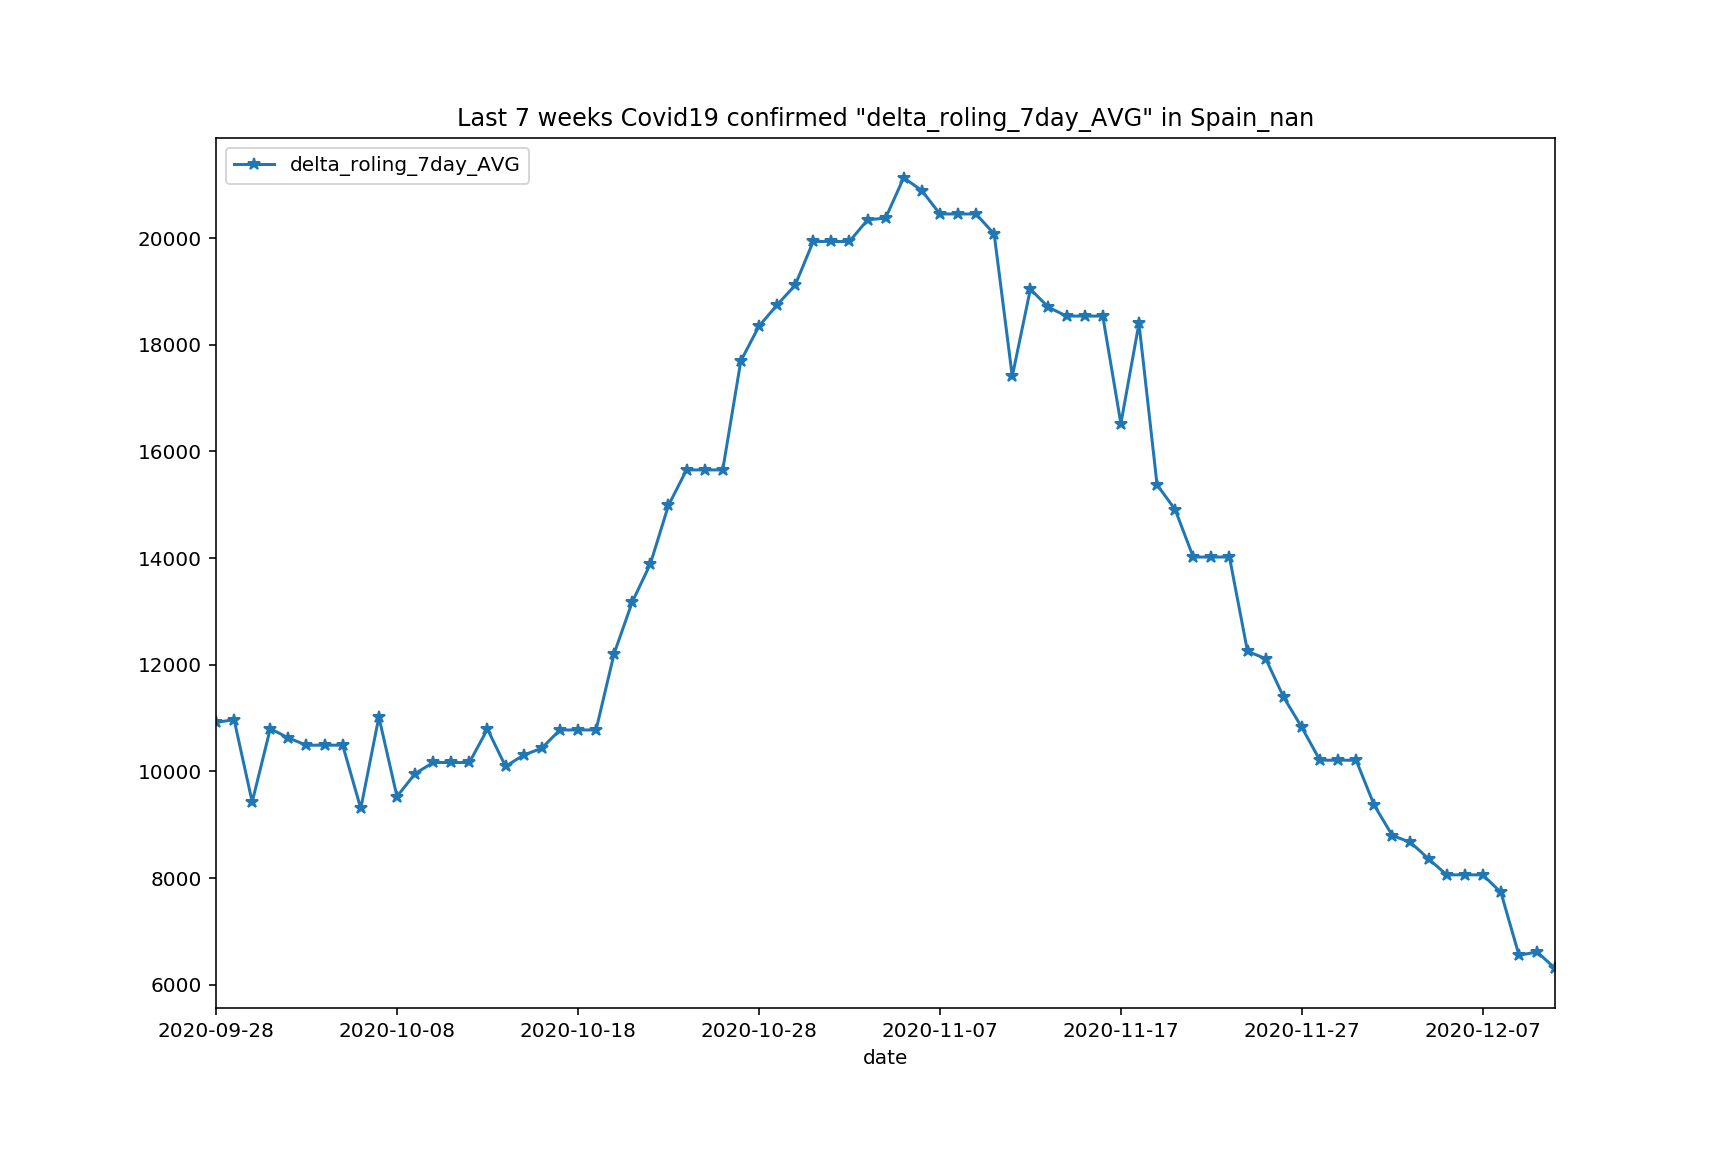

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


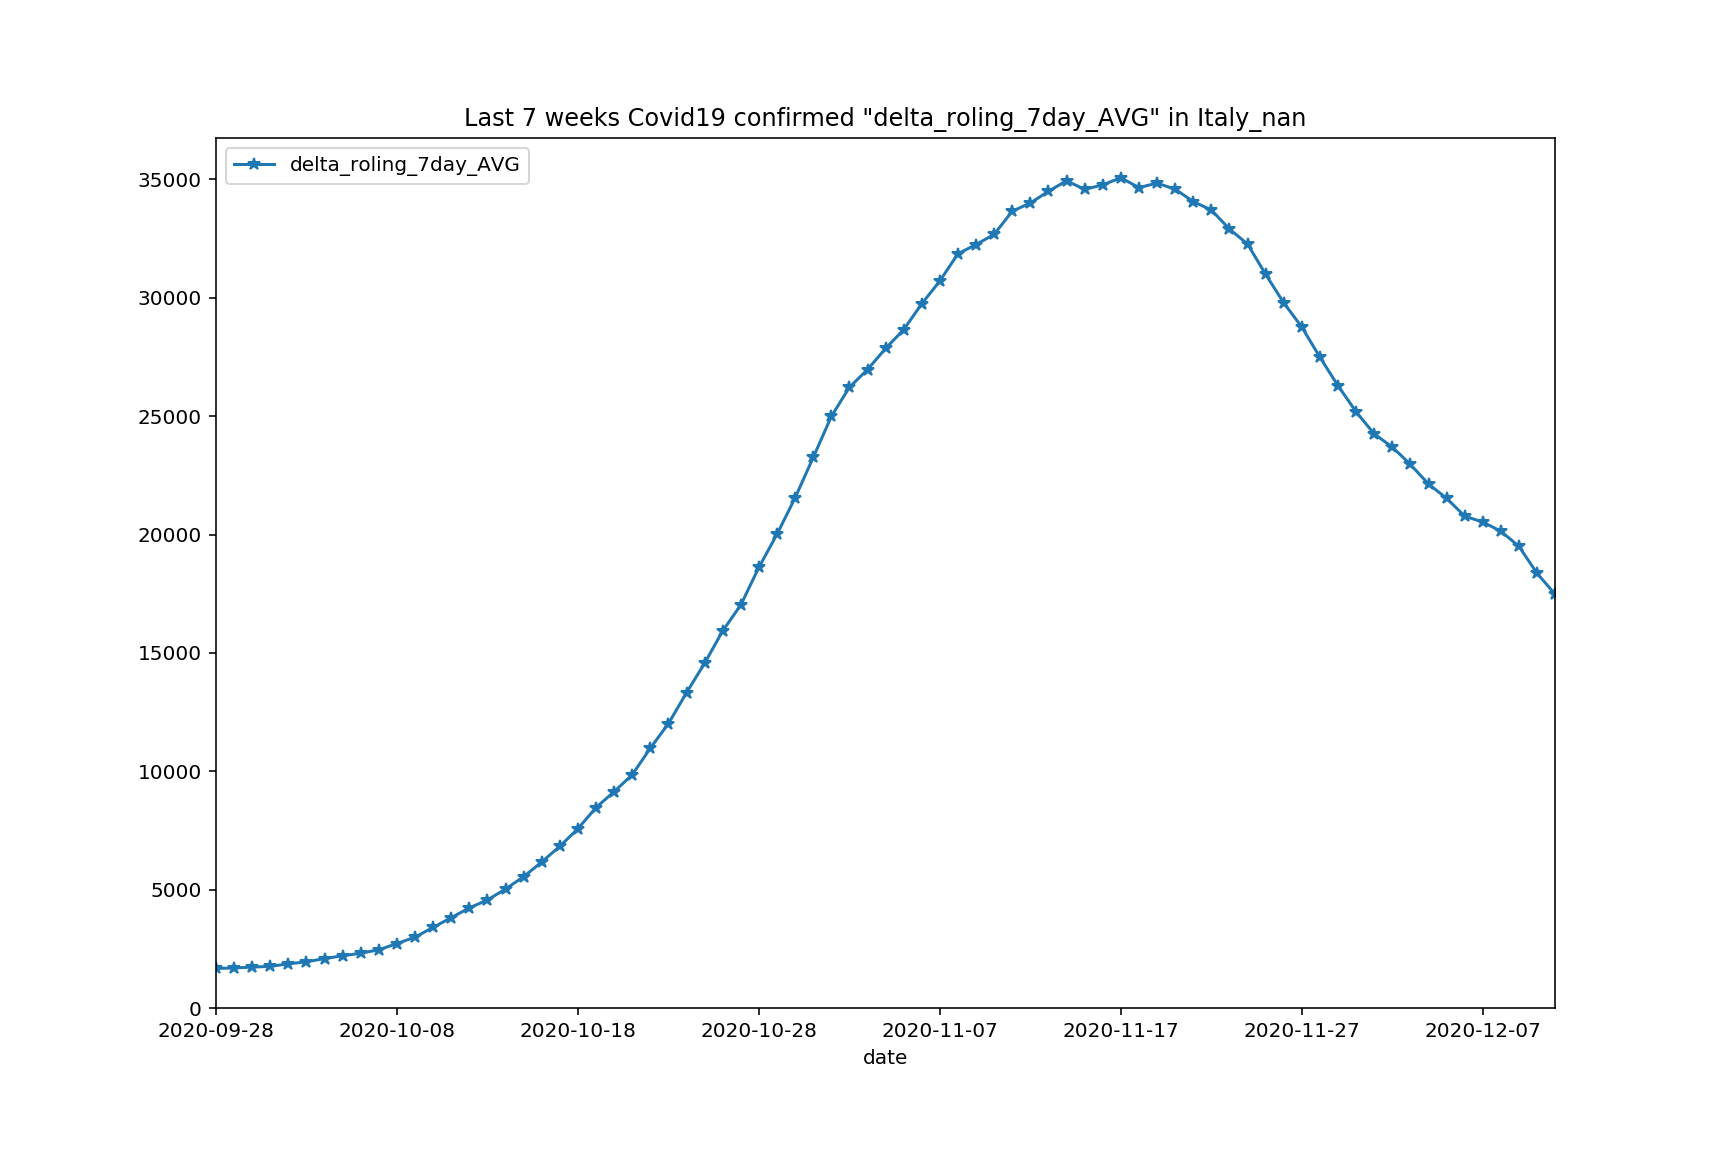

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


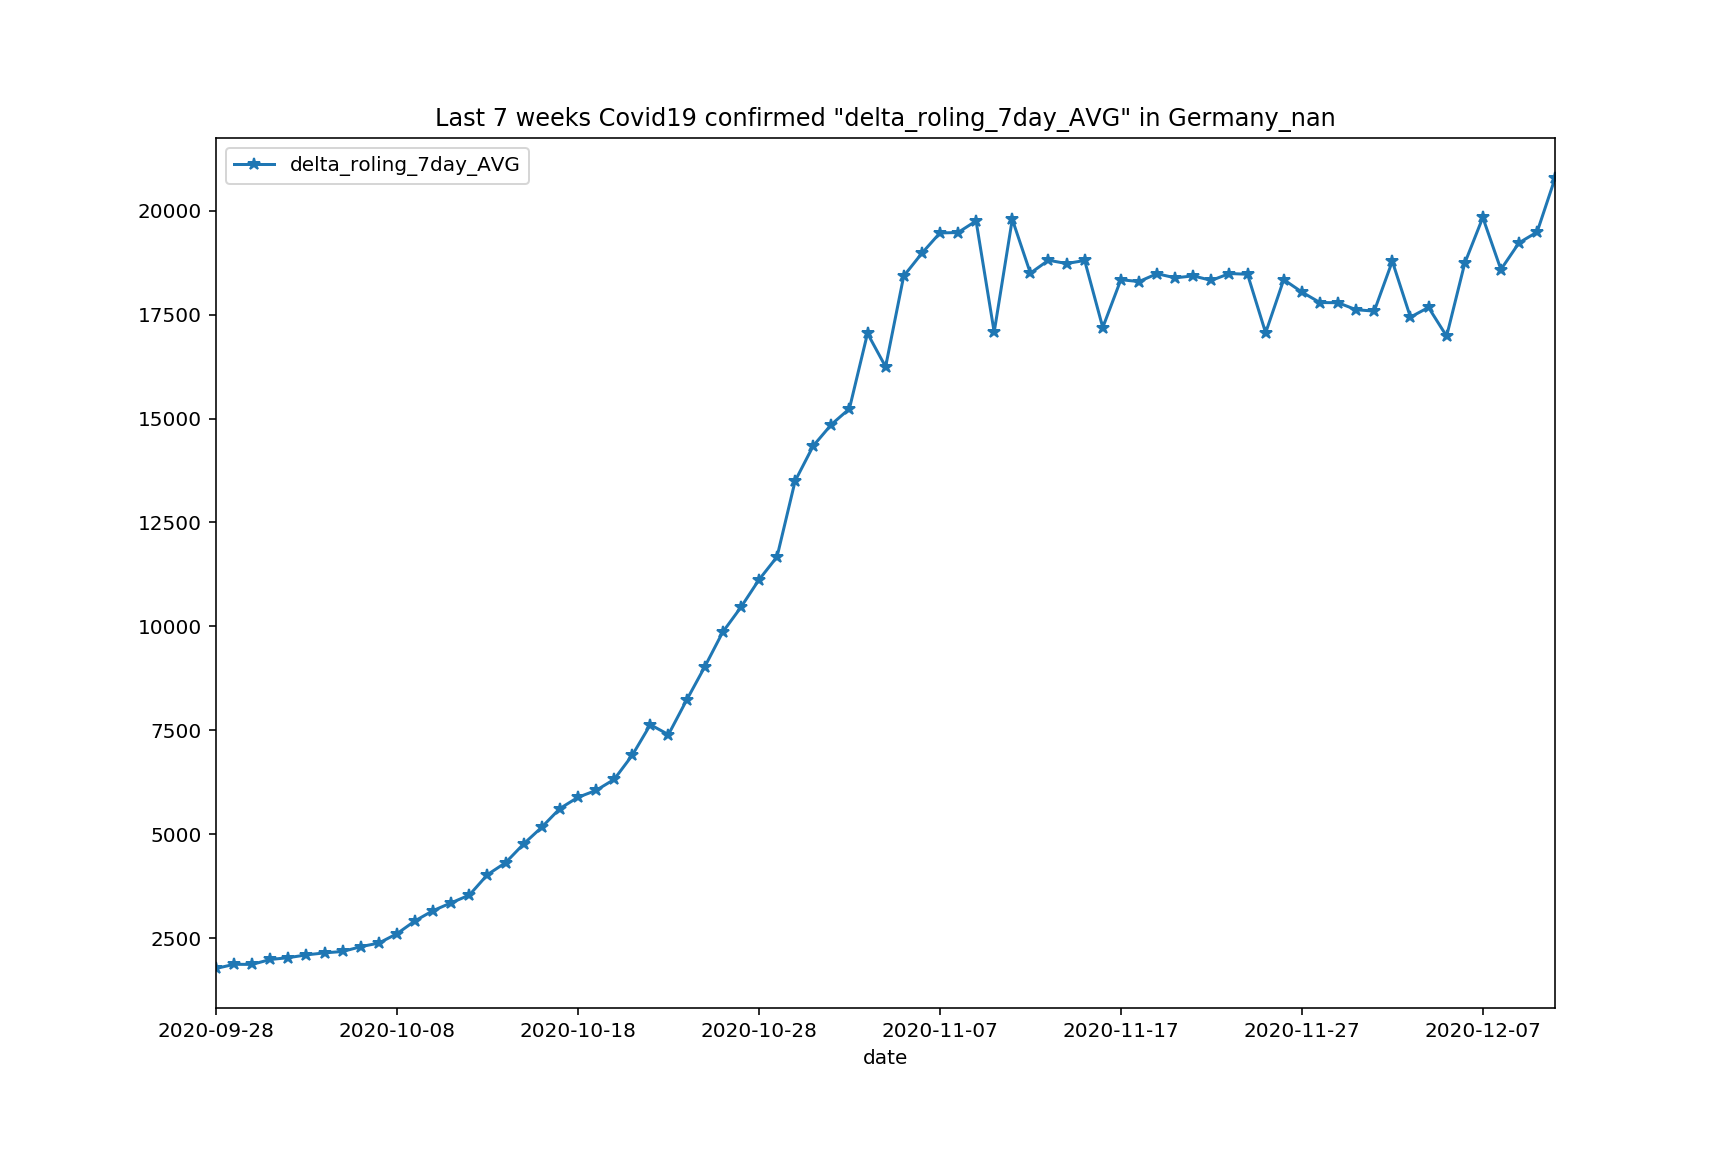

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


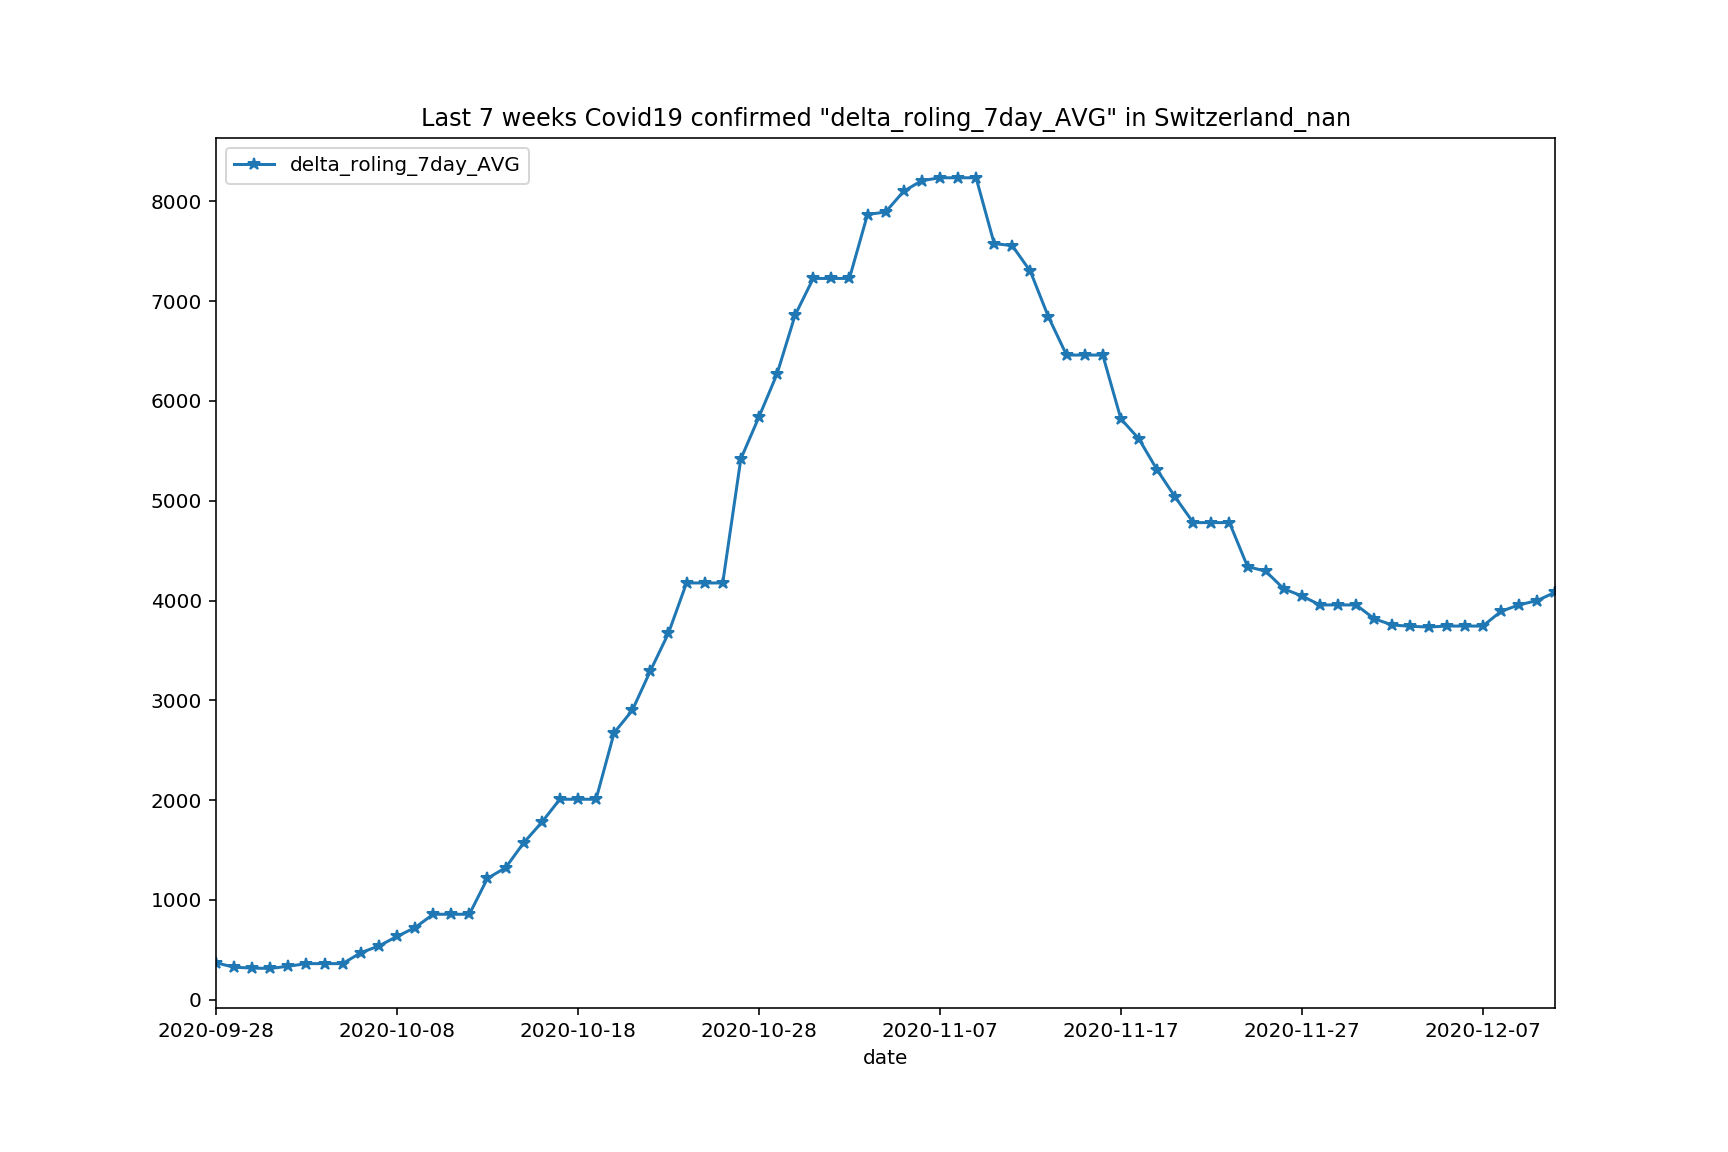

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


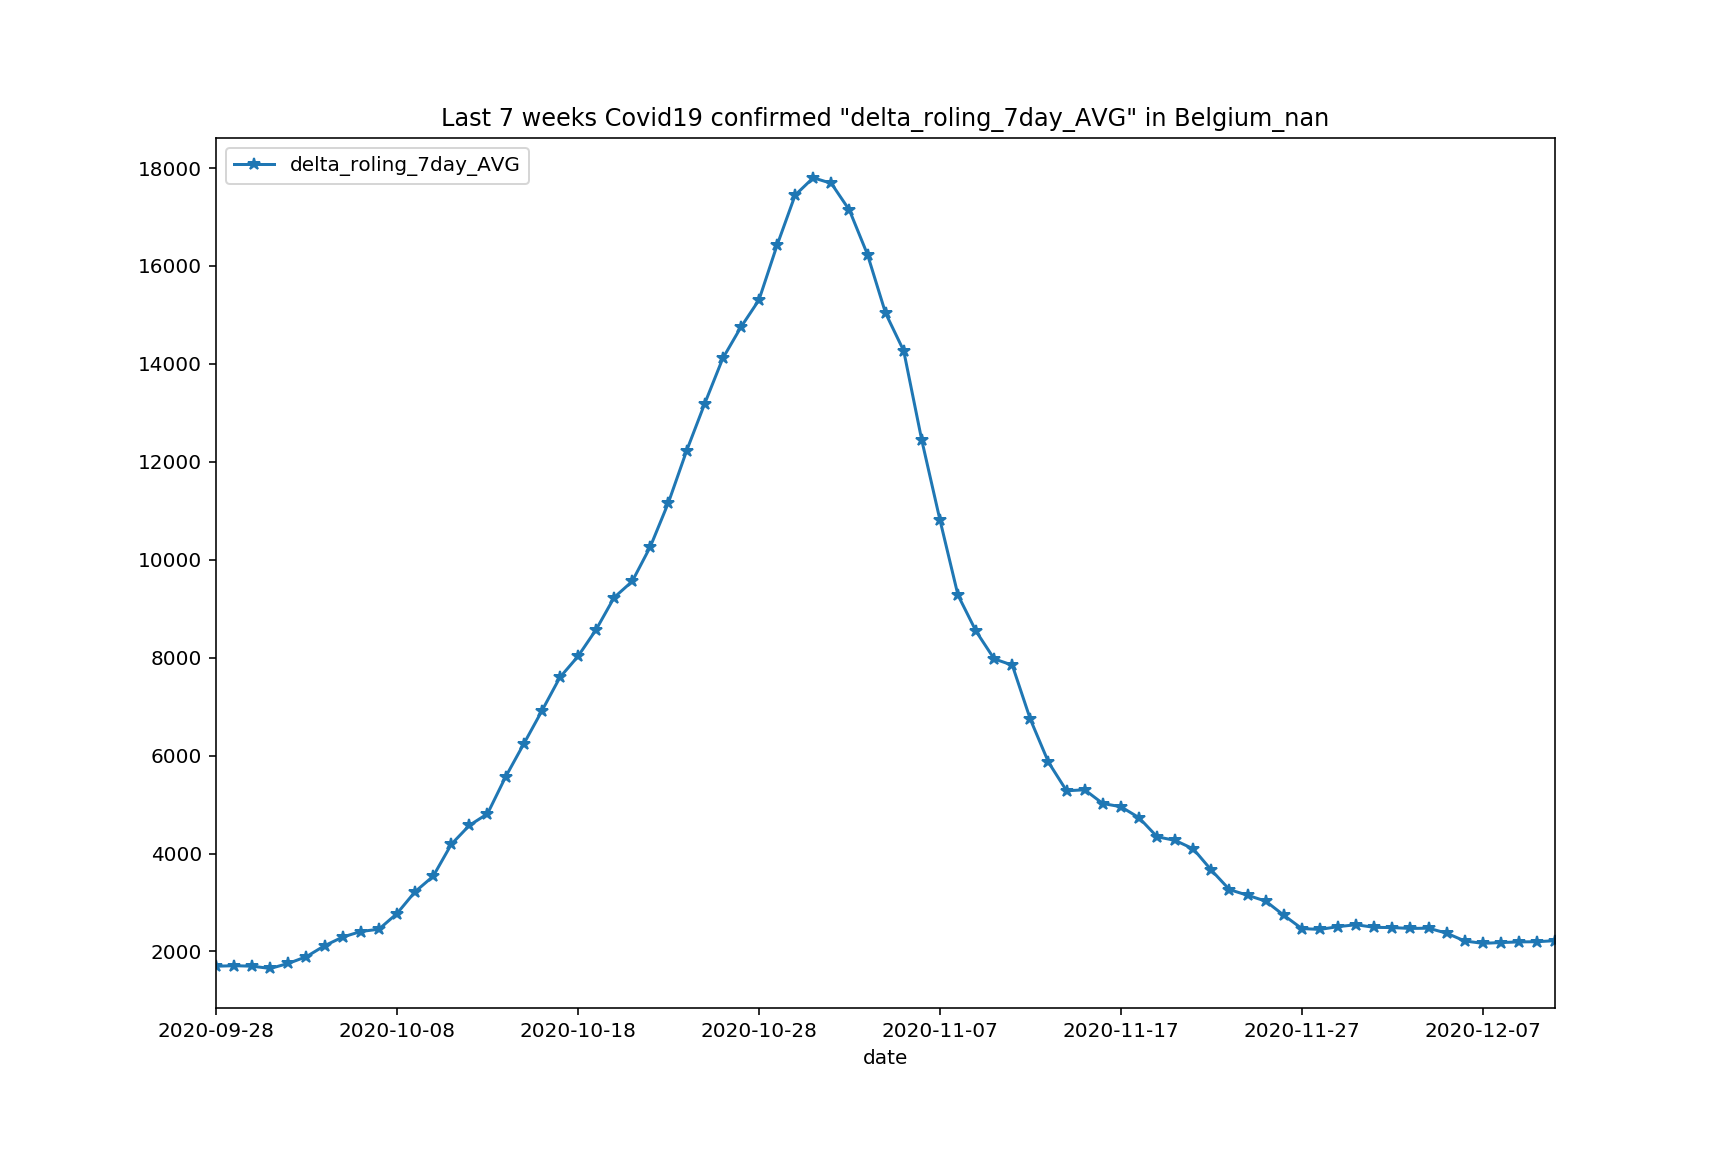

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


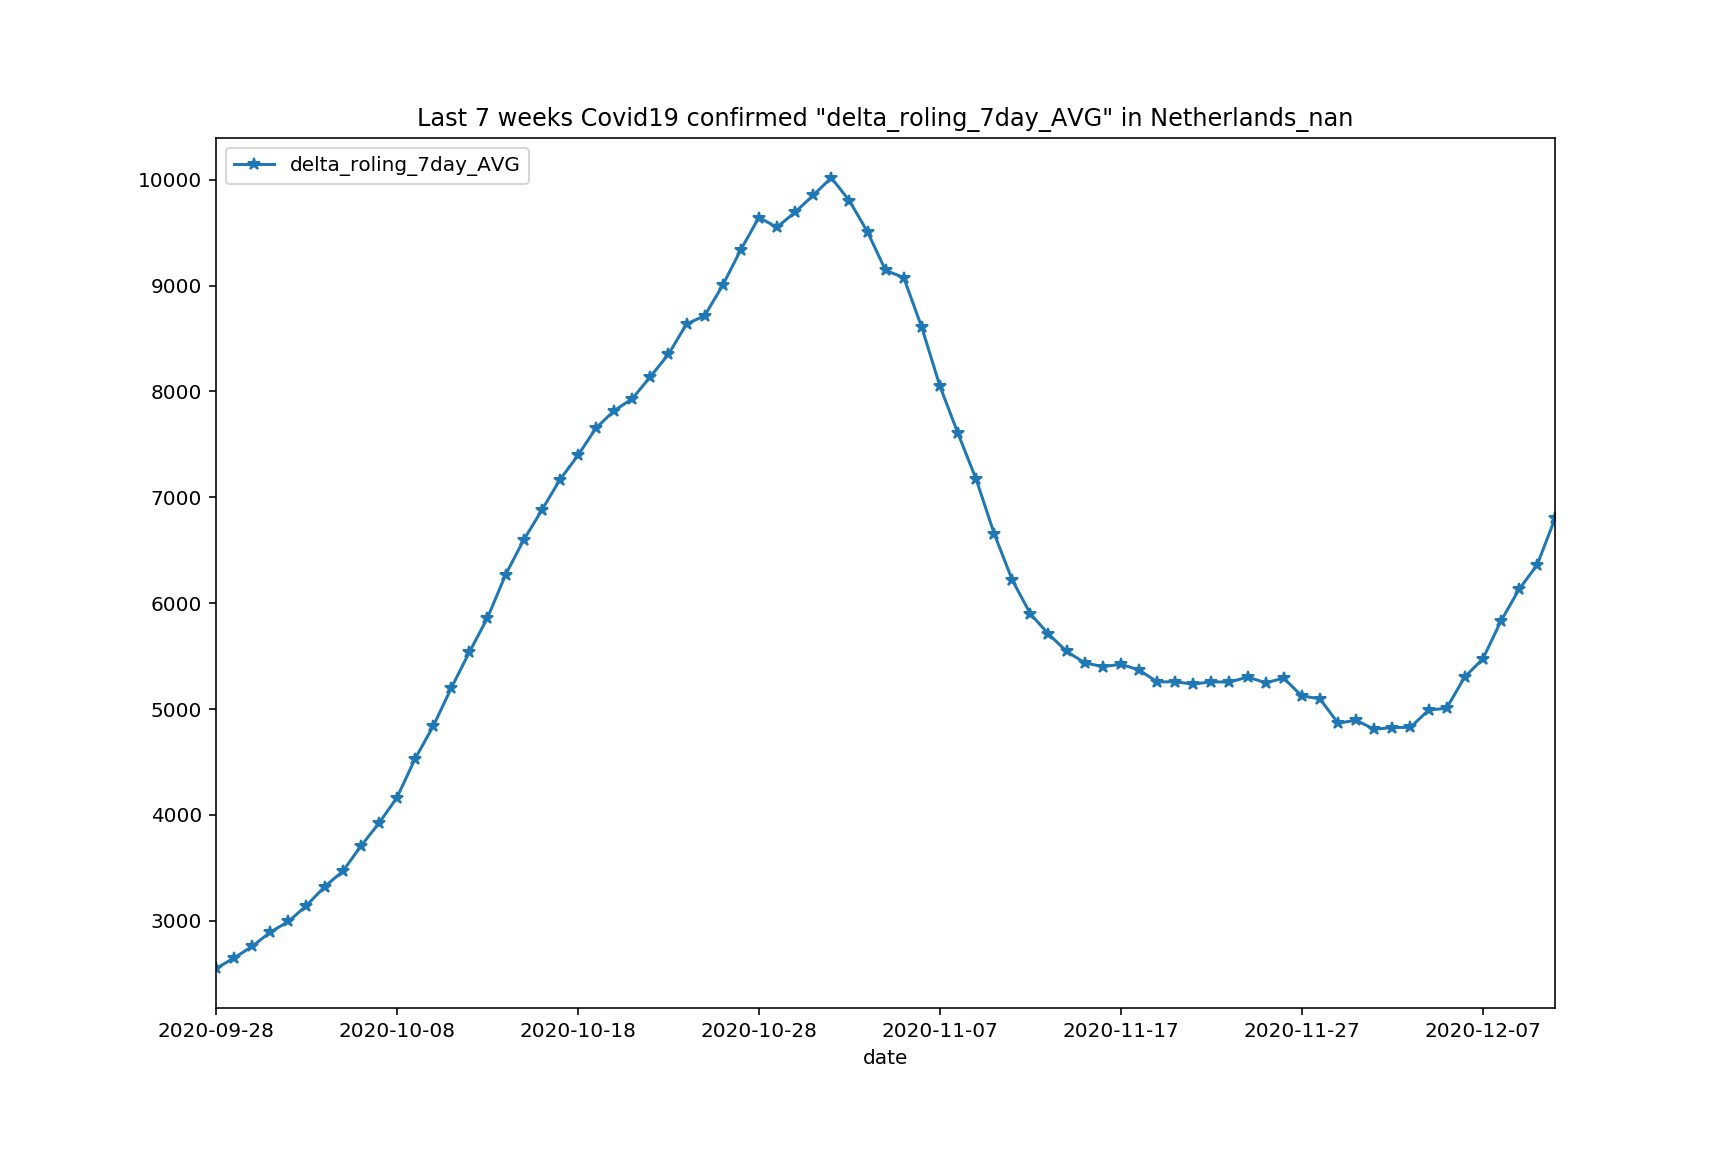

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


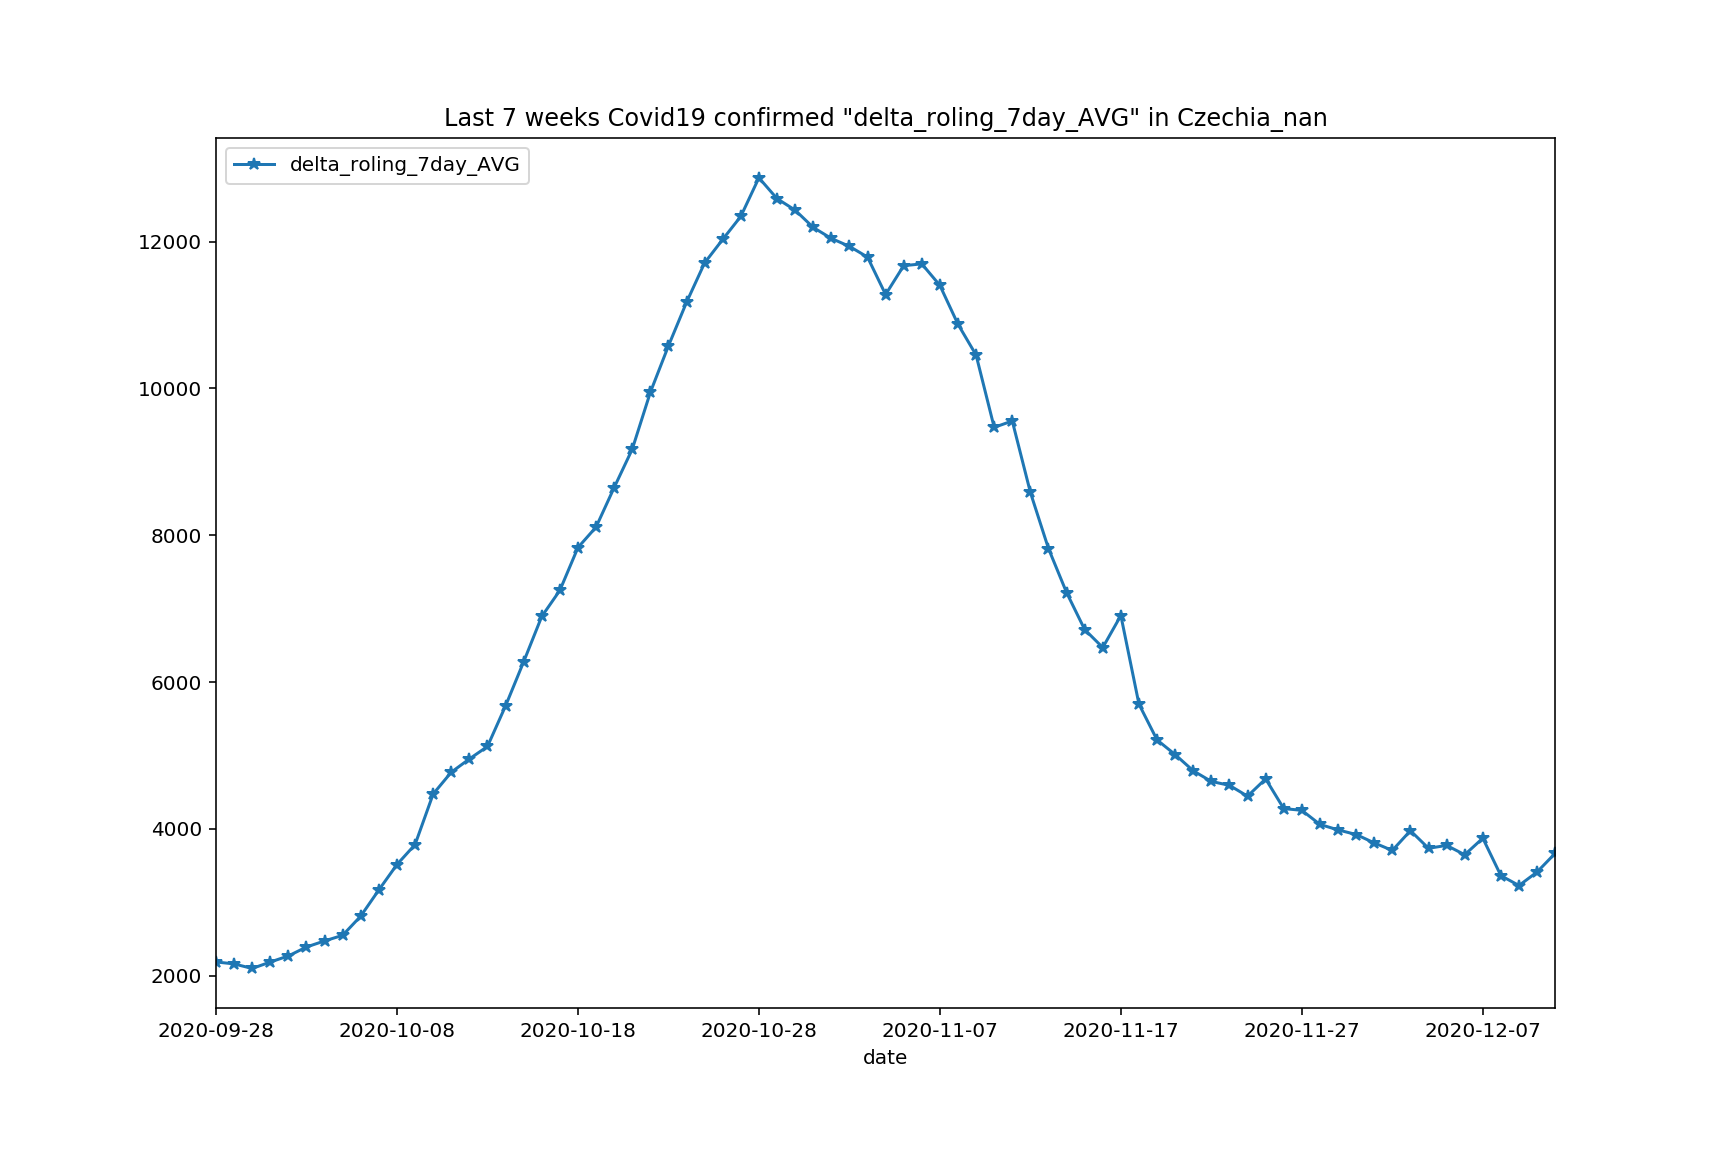

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


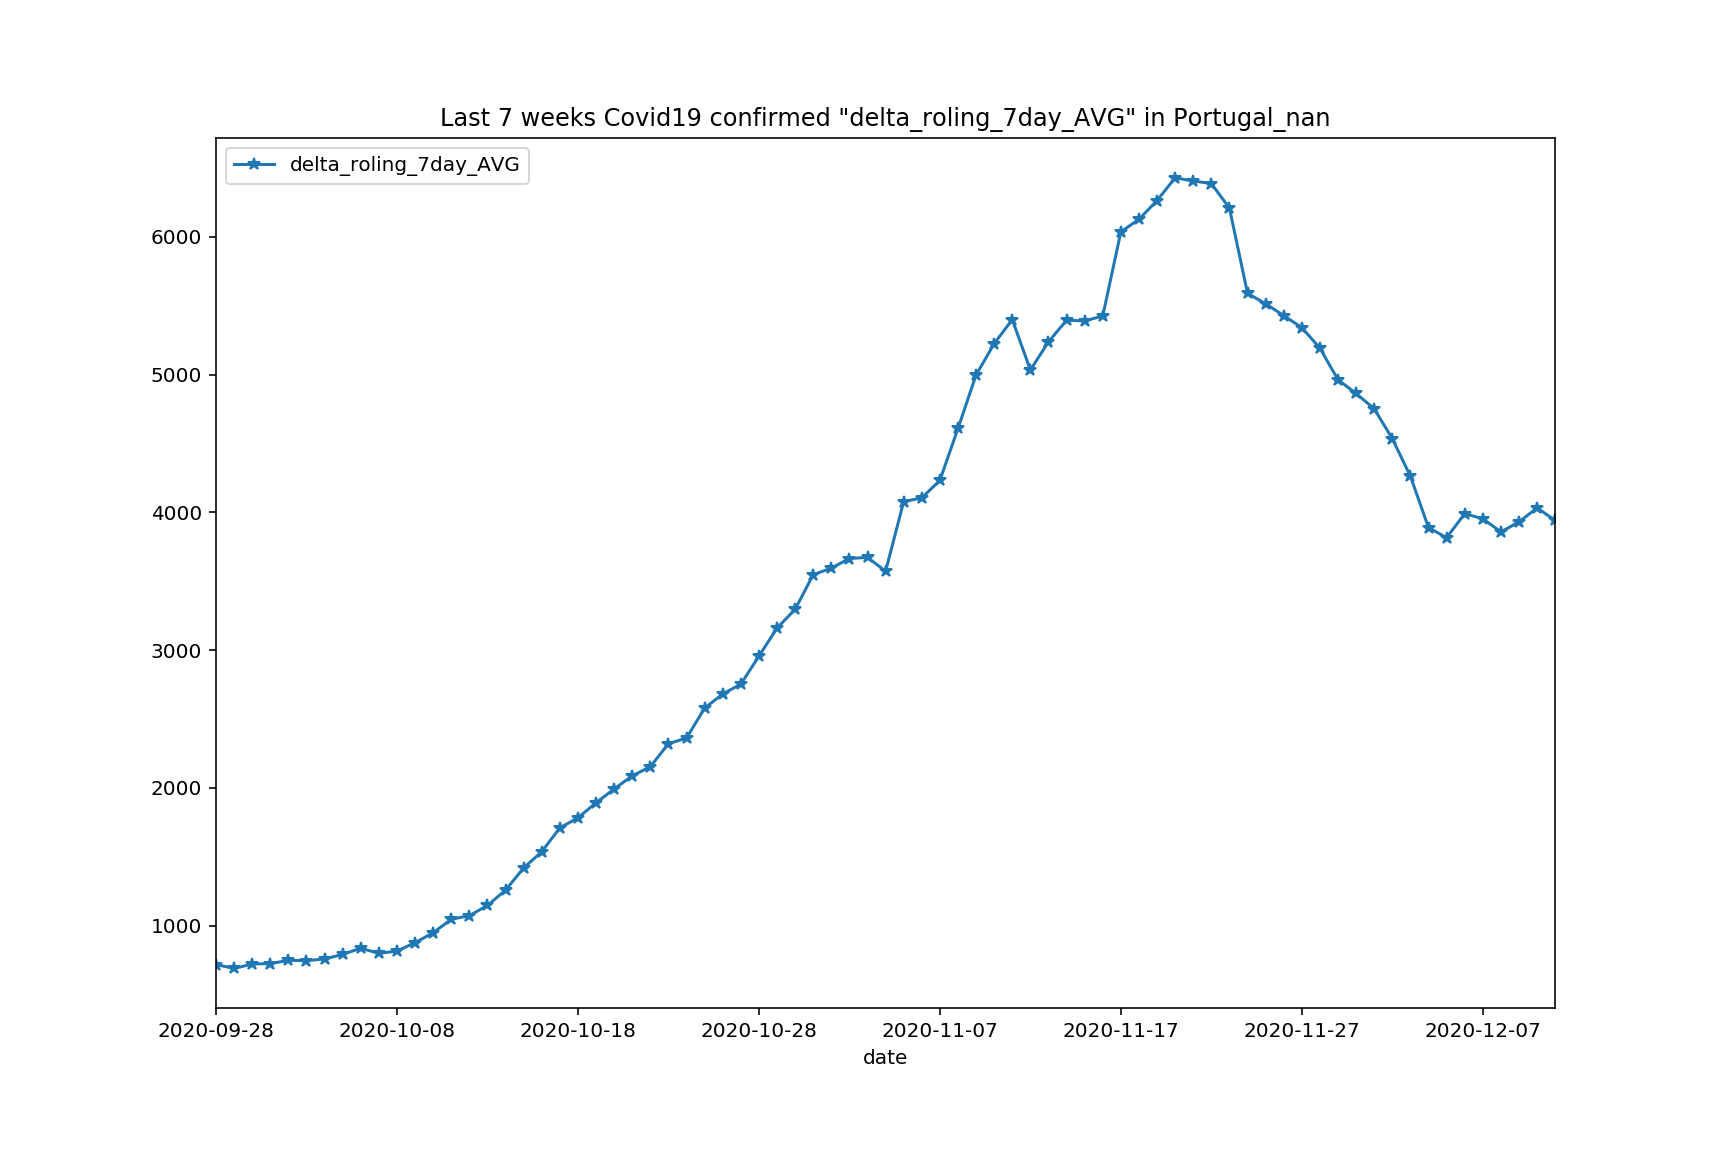

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()